In [1]:
%load_ext autoreload
%autoreload 2
import torch
from torch.autograd import Variable
import seaborn as sns
import torch.nn.functional as F
import math
import os
import pandas as pd
import matplotlib.ticker as mtick

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

label_size = 18
sns.set(font_scale=1.1)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['text.usetex'] = True
blue_colors = ['lightsteelblue', 'cornflowerblue', 'blue', 'midnightblue', 'black', 'green']

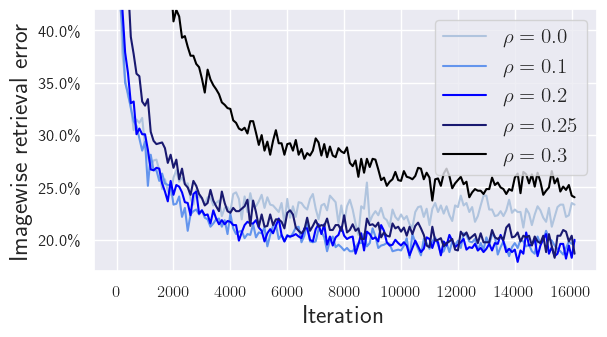

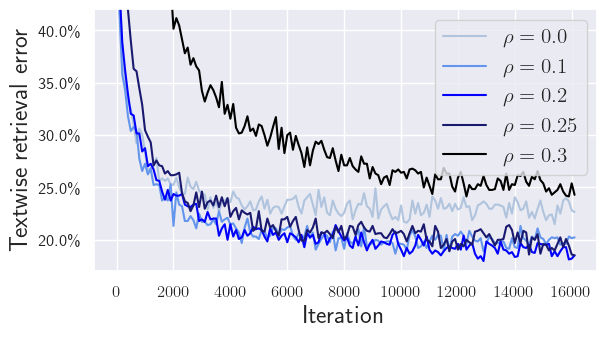

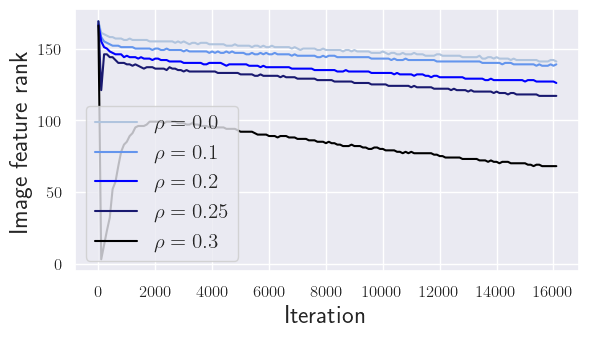

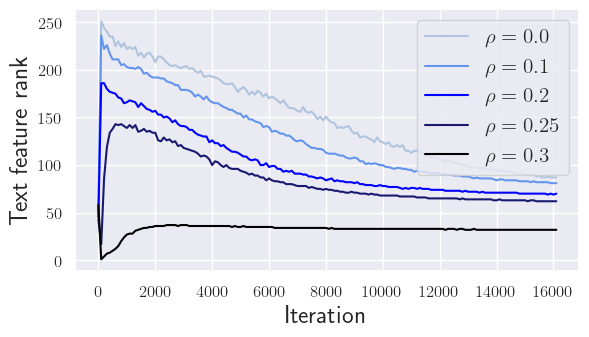

In [62]:
### Plots over iterations
data_all = [
    {'model_dir': 'lr=0.0001_rho=0.0_random_init_image=False_random_init_text=False_bottleneck_dim=-1_unfrozen_text_long', 'test_imagewise_acc': [0.9375, 54.21875, 62.109375, 64.6875, 66.25, 67.1875, 69.53125, 68.515625, 68.828125, 68.359375, 71.09375, 72.109375, 72.96875, 72.421875, 72.34375, 73.359375, 75.15625, 74.21875, 75.3125, 75.703125, 74.0625, 73.359375, 74.453125, 74.0625, 74.6875, 74.609375, 76.09375, 76.640625, 75.234375, 75.9375, 76.015625, 76.640625, 75.9375, 75.9375, 76.71875, 76.484375, 76.25, 77.734375, 76.953125, 76.875, 77.34375, 75.625, 75.46875, 76.09375, 78.046875, 75.859375, 77.34375, 75.546875, 76.796875, 76.796875, 76.328125, 75.703125, 76.953125, 75.9375, 76.640625, 76.71875, 77.03125, 77.34375, 76.484375, 78.4375, 76.09375, 77.890625, 76.796875, 77.8125, 76.40625, 76.484375, 76.875, 77.109375, 76.09375, 75.625, 77.03125, 78.046875, 76.71875, 76.5625, 77.1875, 75.78125, 76.09375, 76.40625, 78.4375, 76.71875, 78.359375, 76.796875, 76.171875, 77.109375, 78.4375, 79.53125, 76.796875, 77.03125, 74.53125, 78.28125, 77.65625, 77.265625, 77.65625, 76.953125, 77.890625, 78.125, 78.75, 77.109375, 77.8125, 78.125, 77.578125, 78.046875, 77.734375, 78.515625, 78.828125, 77.34375, 76.875, 76.796875, 77.8125, 77.03125, 78.59375, 77.03125, 76.484375, 77.34375, 76.71875, 77.5, 76.796875, 77.65625, 78.203125, 76.71875, 76.875, 75.78125, 76.71875, 76.484375, 77.34375, 76.875, 78.28125, 77.734375, 76.71875, 75.78125, 75.78125, 77.109375, 77.109375, 77.734375, 77.65625, 77.265625, 77.734375, 77.1875, 76.171875, 77.421875, 77.109375, 77.34375, 77.34375, 78.828125, 77.03125, 77.5, 78.59375, 77.578125, 76.796875, 77.1875, 77.890625, 78.28125, 76.953125, 78.75, 77.8125, 76.875, 76.640625, 76.640625, 77.8125, 77.65625, 76.484375, 76.640625], 'test_textwise_acc': [2.34375, 55.859375, 61.796875, 65.15625, 66.875, 67.5, 69.0625, 70.78125, 69.375, 69.921875, 71.640625, 73.4375, 73.125, 72.96875, 72.1875, 74.375, 74.140625, 74.375, 74.140625, 74.6875, 74.765625, 74.0625, 75.0, 75.546875, 75.625, 74.0625, 74.921875, 75.15625, 74.453125, 75.3125, 75.546875, 75.703125, 77.109375, 75.9375, 76.953125, 76.328125, 77.265625, 76.484375, 76.25, 76.015625, 76.40625, 75.390625, 75.9375, 76.09375, 76.71875, 77.109375, 76.796875, 76.328125, 77.1875, 77.109375, 76.328125, 75.859375, 77.03125, 76.171875, 77.5, 76.953125, 76.796875, 76.875, 77.5, 76.796875, 76.171875, 76.171875, 76.09375, 75.78125, 76.875, 77.5, 76.25, 75.9375, 75.625, 76.640625, 77.65625, 75.234375, 76.875, 75.9375, 77.421875, 77.65625, 76.25, 77.03125, 77.5, 77.734375, 77.421875, 76.5625, 76.25, 78.046875, 77.1875, 76.5625, 76.640625, 75.546875, 76.796875, 77.03125, 77.8125, 75.078125, 77.96875, 77.109375, 76.796875, 76.5625, 77.421875, 78.046875, 77.8125, 78.125, 76.71875, 78.28125, 78.359375, 78.046875, 76.25, 77.5, 76.484375, 77.65625, 77.421875, 76.640625, 77.8125, 75.859375, 76.25, 77.03125, 76.015625, 77.03125, 76.953125, 76.5625, 77.265625, 76.5625, 77.109375, 76.953125, 75.9375, 76.875, 76.796875, 78.125, 77.65625, 76.71875, 76.5625, 76.328125, 76.5625, 77.03125, 77.03125, 76.640625, 76.640625, 76.71875, 76.875, 77.890625, 76.484375, 77.5, 75.9375, 76.40625, 77.1875, 77.03125, 76.328125, 77.890625, 77.34375, 77.96875, 77.03125, 76.25, 77.34375, 78.125, 77.65625, 77.578125, 78.515625, 76.71875, 77.5, 76.25, 76.015625, 76.328125, 77.1875, 77.34375], 'train_image_rank_99p': [169.0, 161.0, 160.0, 159.0, 158.0, 158.0, 157.0, 157.0, 157.0, 156.0, 156.0, 157.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 155.0, 155.0, 155.0, 155.0, 155.0, 155.0, 155.0, 155.0, 155.0, 154.0, 155.0, 154.0, 155.0, 154.0, 153.0, 154.0, 154.0, 153.0, 154.0, 154.0, 154.0, 153.0, 153.0, 153.0, 153.0, 153.0, 153.0, 152.0, 152.0, 152.0, 153.0, 152.0, 152.0, 152.0, 152.0, 152.0, 151.0, 152.0, 152.0, 151.0, 152.0, 151.0, 151.0, 152.0, 151.0, 151.0, 151.0, 151.0, 151.0, 151.0, 150.0, 151.0, 150.0, 149.0, 150.0, 150.0, 150.0, 150.0, 150.0, 149.0, 149.0, 150.0, 149.0, 149.0, 149.0, 149.0, 149.0, 149.0, 148.0, 149.0, 149.0, 148.0, 149.0, 148.0, 148.0, 148.0, 148.0, 148.0, 147.0, 147.0, 147.0, 147.0, 148.0, 147.0, 146.0, 147.0, 147.0, 146.0, 146.0, 147.0, 146.0, 146.0, 146.0, 147.0, 146.0, 146.0, 146.0, 145.0, 145.0, 145.0, 145.0, 146.0, 146.0, 145.0, 145.0, 145.0, 145.0, 145.0, 145.0, 145.0, 144.0, 144.0, 144.0, 144.0, 144.0, 144.0, 145.0, 143.0, 143.0, 144.0, 144.0, 143.0, 144.0, 143.0, 143.0, 143.0, 143.0, 142.0, 143.0, 142.0, 142.0, 142.0, 142.0, 142.0, 142.0, 142.0, 142.0, 141.0, 141.0, 141.0, 141.0, 142.0, 142.0, 141.0], 'train_text_rank_99p': [49.0, 251.0, 244.0, 240.0, 235.0, 235.0, 225.0, 230.0, 224.0, 228.0, 222.0, 224.0, 222.0, 224.0, 215.0, 218.0, 213.0, 217.0, 218.0, 214.0, 208.0, 214.0, 214.0, 211.0, 208.0, 205.0, 204.0, 205.0, 203.0, 202.0, 203.0, 204.0, 201.0, 202.0, 199.0, 197.0, 199.0, 193.0, 193.0, 194.0, 193.0, 192.0, 191.0, 189.0, 186.0, 185.0, 185.0, 186.0, 182.0, 177.0, 180.0, 182.0, 179.0, 174.0, 177.0, 174.0, 178.0, 176.0, 172.0, 175.0, 170.0, 172.0, 170.0, 168.0, 165.0, 168.0, 164.0, 160.0, 160.0, 159.0, 157.0, 156.0, 161.0, 156.0, 155.0, 156.0, 153.0, 148.0, 151.0, 147.0, 151.0, 147.0, 145.0, 144.0, 139.0, 140.0, 139.0, 140.0, 141.0, 136.0, 133.0, 134.0, 129.0, 130.0, 130.0, 128.0, 127.0, 124.0, 129.0, 125.0, 124.0, 122.0, 124.0, 120.0, 119.0, 121.0, 119.0, 121.0, 115.0, 115.0, 113.0, 115.0, 115.0, 113.0, 113.0, 110.0, 110.0, 108.0, 108.0, 108.0, 106.0, 105.0, 104.0, 105.0, 104.0, 103.0, 102.0, 101.0, 101.0, 99.0, 99.0, 97.0, 98.0, 98.0, 96.0, 98.0, 96.0, 95.0, 96.0, 95.0, 94.0, 94.0, 95.0, 93.0, 93.0, 93.0, 92.0, 91.0, 90.0, 91.0, 90.0, 90.0, 90.0, 90.0, 88.0, 89.0, 87.0, 87.0, 88.0, 87.0, 87.0, 87.0]},
    {'model_dir': 'lr=0.0001_rho=0.1_random_init_image=False_random_init_text=False_bottleneck_dim=-1_unfrozen_text_long', 'test_imagewise_acc': [0.9375, 56.71875, 59.609375, 65.0, 66.015625, 67.421875, 68.671875, 69.140625, 70.3125, 71.484375, 70.625, 74.84375, 71.875, 73.359375, 73.359375, 74.375, 73.671875, 74.609375, 74.765625, 74.765625, 76.640625, 76.5625, 75.859375, 77.8125, 76.953125, 79.140625, 77.578125, 77.265625, 77.109375, 77.578125, 77.1875, 77.890625, 78.046875, 78.75, 78.4375, 78.046875, 77.96875, 78.75, 78.125, 79.453125, 77.5, 78.90625, 79.453125, 79.21875, 79.140625, 79.84375, 79.453125, 79.53125, 78.515625, 79.765625, 79.296875, 79.375, 78.828125, 80.625, 79.53125, 78.671875, 78.515625, 79.921875, 79.53125, 80.15625, 79.53125, 79.765625, 79.375, 78.828125, 78.75, 80.234375, 79.609375, 78.359375, 80.15625, 80.234375, 80.15625, 78.984375, 79.21875, 79.765625, 81.09375, 80.078125, 79.6875, 80.703125, 80.46875, 80.703125, 81.015625, 80.78125, 81.09375, 81.09375, 80.703125, 80.3125, 80.3125, 79.453125, 80.625, 80.3125, 78.90625, 79.6875, 80.78125, 80.546875, 80.46875, 80.3125, 80.390625, 81.09375, 81.015625, 80.9375, 81.015625, 80.546875, 79.84375, 81.71875, 79.453125, 80.234375, 80.859375, 81.484375, 79.921875, 80.3125, 80.859375, 80.15625, 79.765625, 80.46875, 81.25, 81.09375, 80.3125, 81.171875, 80.15625, 80.546875, 80.078125, 80.78125, 79.375, 79.53125, 80.15625, 80.234375, 79.921875, 81.015625, 80.3125, 80.9375, 79.765625, 80.46875, 79.453125, 79.6875, 81.40625, 80.703125, 80.15625, 80.78125, 81.5625, 80.703125, 80.3125, 80.78125, 80.0, 80.15625, 80.625, 80.46875, 81.09375, 81.328125, 79.6875, 80.390625, 80.078125, 79.140625, 79.921875, 80.078125, 80.546875, 80.859375, 81.09375, 81.40625, 80.78125, 80.15625, 80.390625, 80.15625], 'test_textwise_acc': [2.109375, 58.359375, 64.21875, 65.703125, 68.203125, 69.609375, 69.21875, 69.609375, 72.265625, 73.4375, 72.734375, 73.75, 73.203125, 74.765625, 74.6875, 74.765625, 76.25, 75.9375, 76.25, 74.6875, 78.671875, 75.46875, 76.640625, 76.796875, 78.203125, 78.203125, 77.734375, 78.125, 78.90625, 77.5, 78.28125, 78.28125, 78.59375, 78.515625, 78.046875, 78.515625, 77.265625, 78.28125, 78.046875, 77.890625, 78.515625, 78.4375, 78.90625, 79.296875, 80.3125, 78.828125, 77.96875, 79.296875, 79.6875, 79.6875, 79.921875, 79.0625, 79.21875, 79.765625, 79.609375, 78.828125, 78.90625, 79.609375, 78.984375, 79.0625, 78.828125, 78.671875, 79.609375, 80.0, 79.375, 79.84375, 79.6875, 78.671875, 79.84375, 79.296875, 80.9375, 80.390625, 79.921875, 79.453125, 79.609375, 80.234375, 79.21875, 81.015625, 79.84375, 79.84375, 80.859375, 79.375, 80.15625, 80.390625, 79.765625, 78.984375, 80.625, 78.75, 80.625, 80.46875, 80.3125, 80.0, 80.078125, 80.46875, 80.234375, 80.15625, 80.15625, 80.3125, 81.328125, 80.3125, 80.390625, 80.46875, 80.9375, 79.609375, 79.0625, 79.6875, 80.78125, 80.625, 80.15625, 80.78125, 80.15625, 79.609375, 80.0, 79.53125, 79.609375, 81.015625, 79.53125, 81.015625, 79.6875, 79.453125, 79.609375, 79.21875, 79.609375, 80.390625, 79.140625, 79.6875, 80.078125, 80.15625, 79.84375, 81.09375, 80.390625, 79.6875, 79.921875, 80.3125, 80.3125, 80.15625, 80.15625, 80.78125, 80.859375, 79.84375, 80.703125, 80.78125, 78.671875, 79.84375, 80.078125, 80.46875, 79.6875, 80.0, 78.90625, 79.765625, 79.921875, 80.390625, 80.0, 79.765625, 79.84375, 79.765625, 80.46875, 80.3125, 80.390625, 79.6875, 79.84375, 79.765625], 'train_image_rank_99p': [169.0, 158.0, 155.0, 154.0, 153.0, 152.0, 152.0, 152.0, 151.0, 151.0, 151.0, 151.0, 151.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 149.0, 150.0, 150.0, 149.0, 149.0, 150.0, 149.0, 149.0, 149.0, 149.0, 149.0, 148.0, 149.0, 148.0, 148.0, 148.0, 148.0, 148.0, 148.0, 148.0, 147.0, 148.0, 147.0, 148.0, 147.0, 147.0, 148.0, 147.0, 148.0, 147.0, 147.0, 147.0, 147.0, 146.0, 146.0, 147.0, 146.0, 146.0, 147.0, 146.0, 147.0, 146.0, 146.0, 147.0, 146.0, 146.0, 146.0, 146.0, 146.0, 145.0, 146.0, 145.0, 145.0, 145.0, 145.0, 145.0, 145.0, 145.0, 144.0, 144.0, 145.0, 144.0, 145.0, 145.0, 145.0, 144.0, 144.0, 144.0, 144.0, 144.0, 144.0, 144.0, 144.0, 144.0, 144.0, 144.0, 144.0, 143.0, 143.0, 143.0, 143.0, 143.0, 143.0, 143.0, 142.0, 143.0, 142.0, 142.0, 142.0, 143.0, 142.0, 142.0, 142.0, 142.0, 142.0, 142.0, 142.0, 142.0, 142.0, 142.0, 141.0, 141.0, 141.0, 141.0, 141.0, 141.0, 141.0, 141.0, 141.0, 141.0, 141.0, 141.0, 141.0, 141.0, 141.0, 141.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 139.0, 140.0, 140.0, 140.0, 139.0, 139.0, 139.0, 139.0, 139.0, 139.0, 139.0, 139.0, 138.0, 139.0, 138.0, 138.0, 138.0, 139.0, 138.0, 139.0], 'train_text_rank_99p': [52.0, 236.0, 222.0, 226.0, 217.0, 211.0, 211.0, 211.0, 205.0, 206.0, 203.0, 202.0, 202.0, 201.0, 203.0, 201.0, 196.0, 197.0, 194.0, 192.0, 192.0, 192.0, 191.0, 191.0, 188.0, 187.0, 186.0, 184.0, 184.0, 179.0, 179.0, 179.0, 178.0, 176.0, 172.0, 174.0, 172.0, 169.0, 172.0, 168.0, 166.0, 165.0, 165.0, 163.0, 161.0, 160.0, 158.0, 158.0, 156.0, 154.0, 154.0, 150.0, 152.0, 148.0, 148.0, 146.0, 145.0, 144.0, 140.0, 141.0, 140.0, 135.0, 136.0, 135.0, 133.0, 133.0, 131.0, 131.0, 129.0, 126.0, 125.0, 126.0, 125.0, 122.0, 120.0, 118.0, 118.0, 117.0, 117.0, 116.0, 113.0, 112.0, 112.0, 112.0, 111.0, 110.0, 110.0, 108.0, 107.0, 107.0, 108.0, 107.0, 104.0, 104.0, 101.0, 102.0, 101.0, 102.0, 101.0, 100.0, 100.0, 98.0, 98.0, 97.0, 96.0, 97.0, 97.0, 96.0, 96.0, 95.0, 95.0, 93.0, 94.0, 93.0, 93.0, 93.0, 92.0, 91.0, 91.0, 92.0, 91.0, 90.0, 90.0, 90.0, 90.0, 89.0, 89.0, 89.0, 88.0, 88.0, 88.0, 87.0, 86.0, 87.0, 86.0, 86.0, 86.0, 86.0, 86.0, 85.0, 84.0, 85.0, 85.0, 84.0, 84.0, 84.0, 84.0, 84.0, 83.0, 83.0, 83.0, 83.0, 82.0, 83.0, 82.0, 82.0, 82.0, 82.0, 82.0, 81.0, 81.0, 81.0]},
    {'model_dir': 'lr=0.0001_rho=0.2_random_init_image=False_random_init_text=False_bottleneck_dim=-1_unfrozen_text_long', 'test_imagewise_acc': [1.015625, 51.484375, 57.8125, 62.109375, 64.0625, 66.953125, 66.796875, 69.921875, 69.375, 69.921875, 69.921875, 71.40625, 73.28125, 73.359375, 73.125, 73.203125, 74.609375, 75.390625, 76.328125, 74.375, 75.703125, 74.765625, 74.921875, 75.46875, 76.40625, 76.484375, 77.65625, 75.625, 75.390625, 77.5, 77.1875, 77.65625, 77.578125, 78.4375, 77.1875, 77.96875, 78.515625, 78.125, 78.515625, 78.203125, 78.28125, 78.59375, 78.59375, 80.078125, 79.296875, 78.59375, 78.28125, 78.4375, 78.4375, 78.125, 78.828125, 79.140625, 80.15625, 79.375, 78.984375, 79.375, 78.671875, 77.96875, 79.53125, 80.15625, 79.609375, 79.6875, 79.609375, 79.453125, 79.6875, 79.84375, 78.90625, 78.90625, 80.0, 80.15625, 78.984375, 78.515625, 79.453125, 78.515625, 80.46875, 79.6875, 80.546875, 79.765625, 79.53125, 78.75, 79.609375, 79.921875, 79.765625, 79.6875, 81.328125, 80.46875, 79.375, 81.015625, 79.21875, 79.453125, 79.921875, 79.765625, 80.15625, 78.59375, 79.140625, 80.234375, 80.546875, 80.46875, 80.0, 80.3125, 80.546875, 80.234375, 80.546875, 81.484375, 80.78125, 80.078125, 80.625, 81.171875, 80.859375, 79.765625, 79.921875, 80.78125, 79.921875, 80.234375, 81.484375, 80.15625, 80.546875, 79.53125, 80.078125, 80.703125, 80.46875, 80.234375, 79.921875, 80.9375, 80.703125, 80.78125, 80.390625, 81.015625, 80.78125, 81.171875, 80.859375, 80.390625, 81.015625, 80.3125, 80.390625, 79.53125, 80.15625, 81.171875, 80.859375, 81.171875, 80.9375, 82.109375, 81.015625, 81.328125, 79.296875, 80.546875, 80.46875, 79.921875, 81.5625, 80.546875, 79.921875, 79.453125, 81.328125, 80.703125, 81.5625, 81.328125, 80.390625, 80.390625, 81.796875, 80.546875, 81.71875, 80.0], 'test_textwise_acc': [1.953125, 56.015625, 61.171875, 63.828125, 66.09375, 67.96875, 68.125, 69.84375, 69.84375, 71.5625, 71.25, 72.96875, 72.734375, 73.28125, 74.296875, 74.375, 75.390625, 76.171875, 75.234375, 76.25, 75.625, 75.78125, 75.78125, 75.625, 76.640625, 76.796875, 76.875, 76.640625, 76.5625, 78.203125, 78.046875, 78.28125, 77.34375, 78.046875, 77.96875, 77.96875, 79.609375, 78.90625, 78.515625, 80.0, 78.515625, 79.6875, 79.0625, 79.921875, 79.765625, 79.0625, 79.609375, 79.375, 78.75, 78.984375, 78.90625, 79.0625, 79.6875, 80.15625, 78.90625, 79.53125, 79.296875, 80.0, 79.609375, 79.375, 80.234375, 79.375, 79.53125, 79.765625, 80.234375, 79.53125, 80.703125, 79.375, 79.765625, 79.53125, 80.390625, 80.234375, 79.296875, 79.375, 80.46875, 79.84375, 79.53125, 78.59375, 79.140625, 79.6875, 80.078125, 79.765625, 80.546875, 80.78125, 79.6875, 80.546875, 79.296875, 80.234375, 81.015625, 80.390625, 80.0, 80.859375, 80.546875, 80.15625, 80.234375, 80.390625, 80.46875, 79.53125, 79.21875, 80.390625, 80.9375, 81.5625, 80.78125, 81.328125, 81.09375, 80.546875, 79.53125, 80.0, 80.546875, 79.6875, 80.9375, 81.328125, 81.015625, 81.171875, 81.484375, 81.09375, 80.78125, 80.625, 80.78125, 80.859375, 80.390625, 80.9375, 79.609375, 80.9375, 80.546875, 80.3125, 81.328125, 81.796875, 81.5625, 82.03125, 80.15625, 80.390625, 80.546875, 80.78125, 81.328125, 80.15625, 80.9375, 81.015625, 81.328125, 81.171875, 81.640625, 81.5625, 80.3125, 80.703125, 80.78125, 80.46875, 81.171875, 81.25, 80.3125, 80.390625, 80.46875, 80.46875, 80.390625, 81.5625, 81.09375, 81.5625, 81.09375, 80.703125, 80.703125, 81.875, 81.796875, 81.484375], 'train_image_rank_99p': [167.0, 155.0, 151.0, 150.0, 148.0, 147.0, 146.0, 146.0, 146.0, 144.0, 145.0, 144.0, 144.0, 144.0, 143.0, 144.0, 143.0, 143.0, 143.0, 142.0, 143.0, 143.0, 142.0, 142.0, 142.0, 141.0, 141.0, 141.0, 141.0, 141.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 139.0, 139.0, 140.0, 140.0, 140.0, 140.0, 140.0, 139.0, 138.0, 139.0, 139.0, 139.0, 139.0, 139.0, 139.0, 139.0, 138.0, 138.0, 138.0, 138.0, 137.0, 138.0, 137.0, 137.0, 137.0, 137.0, 137.0, 137.0, 137.0, 137.0, 137.0, 136.0, 136.0, 136.0, 136.0, 136.0, 136.0, 136.0, 136.0, 135.0, 135.0, 135.0, 135.0, 135.0, 135.0, 135.0, 135.0, 134.0, 134.0, 134.0, 135.0, 134.0, 134.0, 134.0, 134.0, 134.0, 134.0, 134.0, 134.0, 133.0, 133.0, 133.0, 133.0, 133.0, 133.0, 133.0, 133.0, 132.0, 133.0, 132.0, 132.0, 132.0, 132.0, 132.0, 131.0, 132.0, 132.0, 132.0, 131.0, 131.0, 130.0, 131.0, 131.0, 130.0, 130.0, 130.0, 130.0, 130.0, 130.0, 130.0, 130.0, 130.0, 129.0, 129.0, 129.0, 129.0, 129.0, 129.0, 129.0, 128.0, 128.0, 129.0, 128.0, 128.0, 128.0, 128.0, 128.0, 128.0, 128.0, 128.0, 128.0, 128.0, 128.0, 127.0, 128.0, 128.0, 128.0, 127.0, 127.0, 127.0, 127.0, 127.0, 127.0, 127.0, 126.0], 'train_text_rank_99p': [45.0, 186.0, 186.0, 180.0, 177.0, 176.0, 175.0, 171.0, 170.0, 165.0, 166.0, 168.0, 167.0, 166.0, 161.0, 165.0, 162.0, 159.0, 158.0, 156.0, 157.0, 153.0, 153.0, 150.0, 151.0, 149.0, 145.0, 147.0, 143.0, 141.0, 141.0, 140.0, 137.0, 137.0, 134.0, 132.0, 131.0, 130.0, 130.0, 124.0, 126.0, 123.0, 123.0, 120.0, 121.0, 118.0, 116.0, 114.0, 114.0, 113.0, 111.0, 109.0, 109.0, 106.0, 105.0, 106.0, 105.0, 100.0, 100.0, 102.0, 98.0, 99.0, 99.0, 96.0, 96.0, 93.0, 94.0, 93.0, 94.0, 91.0, 91.0, 91.0, 90.0, 90.0, 88.0, 88.0, 87.0, 86.0, 87.0, 86.0, 84.0, 85.0, 86.0, 83.0, 84.0, 83.0, 83.0, 82.0, 82.0, 82.0, 81.0, 82.0, 80.0, 80.0, 79.0, 79.0, 79.0, 78.0, 78.0, 79.0, 78.0, 78.0, 77.0, 77.0, 77.0, 77.0, 76.0, 75.0, 76.0, 75.0, 76.0, 76.0, 75.0, 76.0, 75.0, 75.0, 75.0, 74.0, 74.0, 74.0, 74.0, 74.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 72.0, 73.0, 72.0, 72.0, 72.0, 72.0, 71.0, 72.0, 71.0, 71.0, 71.0, 71.0, 71.0, 71.0, 71.0, 71.0, 71.0, 71.0, 71.0, 71.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 69.0, 70.0, 69.0, 70.0]},
    {'model_dir': 'lr=0.0001_rho=0.25_random_init_image=False_random_init_text=False_bottleneck_dim=-1_unfrozen_text_long', 'test_imagewise_acc': [0.859375, 9.765625, 35.3125, 50.0, 55.390625, 60.625, 62.265625, 64.140625, 64.375, 66.796875, 67.1875, 66.5625, 69.6875, 70.546875, 70.859375, 70.78125, 70.703125, 71.25, 72.65625, 71.875, 73.125, 72.34375, 74.21875, 73.203125, 74.6875, 75.0, 75.703125, 74.375, 74.84375, 75.625, 76.015625, 76.71875, 76.484375, 75.234375, 76.25, 76.796875, 77.265625, 75.390625, 76.484375, 77.265625, 77.421875, 76.953125, 77.265625, 77.265625, 77.03125, 76.796875, 76.171875, 78.671875, 76.25, 77.34375, 78.75, 77.578125, 78.75, 78.671875, 77.578125, 78.59375, 78.046875, 78.046875, 78.28125, 78.90625, 77.421875, 77.1875, 77.578125, 78.828125, 79.140625, 79.375, 79.0625, 77.890625, 79.140625, 78.671875, 78.125, 78.75, 78.59375, 78.671875, 77.96875, 79.0625, 79.0625, 78.59375, 78.59375, 79.140625, 77.65625, 79.296875, 79.0625, 78.515625, 79.140625, 78.90625, 79.921875, 79.921875, 77.96875, 78.59375, 78.515625, 78.75, 78.359375, 79.765625, 79.296875, 79.609375, 79.6875, 78.4375, 78.90625, 78.75, 79.21875, 78.828125, 79.609375, 78.75, 79.453125, 78.671875, 78.359375, 78.90625, 79.53125, 80.546875, 80.703125, 78.75, 80.078125, 80.0, 79.84375, 80.625, 80.3125, 80.15625, 79.921875, 80.9375, 81.015625, 79.21875, 79.609375, 79.296875, 79.921875, 79.6875, 79.453125, 80.3125, 79.375, 80.234375, 80.234375, 80.234375, 79.0625, 79.765625, 79.921875, 79.6875, 80.0, 78.828125, 78.515625, 79.765625, 79.6875, 79.296875, 80.15625, 79.609375, 79.765625, 79.609375, 80.546875, 79.6875, 80.15625, 80.3125, 79.609375, 81.171875, 79.453125, 80.625, 81.71875, 79.609375, 79.609375, 79.0625, 79.21875, 80.15625, 79.609375, 81.328125], 'test_textwise_acc': [1.5625, 11.171875, 36.5625, 51.5625, 58.046875, 61.015625, 63.671875, 63.90625, 65.546875, 67.109375, 69.53125, 70.15625, 70.703125, 72.890625, 72.421875, 72.890625, 72.96875, 73.671875, 73.4375, 73.828125, 73.828125, 73.75, 73.59375, 75.546875, 76.328125, 76.484375, 77.265625, 76.71875, 75.46875, 76.875, 75.390625, 77.03125, 76.40625, 76.25, 76.71875, 75.78125, 76.875, 75.9375, 76.796875, 76.015625, 77.8125, 77.265625, 76.953125, 78.046875, 77.1875, 77.421875, 77.578125, 77.421875, 79.140625, 78.90625, 77.265625, 79.140625, 79.21875, 77.96875, 78.828125, 78.59375, 79.140625, 79.609375, 78.046875, 78.046875, 77.8125, 78.75, 78.203125, 77.8125, 79.0625, 80.078125, 80.078125, 79.0625, 79.296875, 78.828125, 77.96875, 79.84375, 79.296875, 79.375, 79.140625, 79.453125, 79.84375, 78.75, 79.296875, 78.671875, 79.921875, 79.609375, 78.671875, 78.75, 79.53125, 78.59375, 78.28125, 78.828125, 79.140625, 79.21875, 78.671875, 79.453125, 79.375, 79.375, 79.765625, 79.84375, 79.453125, 78.984375, 79.375, 79.296875, 79.140625, 79.453125, 80.15625, 79.375, 78.671875, 79.375, 79.140625, 79.21875, 78.515625, 80.0, 80.15625, 80.625, 78.671875, 79.21875, 80.78125, 80.46875, 79.921875, 81.09375, 80.15625, 79.921875, 80.9375, 80.390625, 80.625, 80.0, 80.234375, 80.46875, 79.21875, 79.140625, 78.984375, 79.375, 79.765625, 79.453125, 80.0, 80.546875, 80.0, 80.0, 79.921875, 78.75, 78.59375, 79.0625, 80.3125, 79.296875, 80.3125, 79.140625, 79.296875, 81.40625, 79.765625, 80.0, 79.453125, 81.328125, 80.390625, 80.46875, 81.015625, 80.78125, 81.015625, 80.390625, 79.765625, 80.703125, 79.921875, 80.546875, 81.40625, 81.484375], 'train_image_rank_99p': [169.0, 121.0, 146.0, 146.0, 144.0, 144.0, 142.0, 140.0, 140.0, 140.0, 139.0, 139.0, 138.0, 139.0, 138.0, 137.0, 136.0, 137.0, 137.0, 137.0, 136.0, 136.0, 136.0, 136.0, 135.0, 137.0, 136.0, 136.0, 135.0, 135.0, 134.0, 135.0, 134.0, 134.0, 134.0, 134.0, 134.0, 134.0, 134.0, 134.0, 134.0, 134.0, 133.0, 133.0, 133.0, 133.0, 133.0, 133.0, 133.0, 133.0, 132.0, 132.0, 132.0, 132.0, 132.0, 131.0, 131.0, 132.0, 131.0, 131.0, 131.0, 131.0, 131.0, 131.0, 130.0, 131.0, 130.0, 130.0, 130.0, 130.0, 129.0, 129.0, 129.0, 129.0, 129.0, 129.0, 129.0, 128.0, 128.0, 128.0, 128.0, 128.0, 128.0, 127.0, 127.0, 127.0, 127.0, 127.0, 127.0, 127.0, 126.0, 126.0, 126.0, 126.0, 126.0, 126.0, 125.0, 125.0, 125.0, 125.0, 125.0, 125.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 123.0, 124.0, 123.0, 123.0, 123.0, 123.0, 123.0, 123.0, 122.0, 122.0, 122.0, 122.0, 122.0, 122.0, 121.0, 122.0, 121.0, 121.0, 121.0, 121.0, 120.0, 121.0, 120.0, 120.0, 120.0, 120.0, 120.0, 120.0, 120.0, 119.0, 120.0, 119.0, 119.0, 119.0, 118.0, 119.0, 119.0, 118.0, 118.0, 118.0, 118.0, 118.0, 118.0, 118.0, 118.0, 117.0, 117.0, 117.0, 117.0, 117.0, 117.0, 117.0], 'train_text_rank_99p': [43.0, 17.0, 86.0, 119.0, 134.0, 138.0, 143.0, 142.0, 143.0, 141.0, 139.0, 142.0, 139.0, 142.0, 135.0, 136.0, 138.0, 135.0, 136.0, 134.0, 134.0, 126.0, 125.0, 129.0, 126.0, 127.0, 124.0, 125.0, 120.0, 121.0, 118.0, 117.0, 116.0, 115.0, 114.0, 112.0, 109.0, 110.0, 109.0, 106.0, 100.0, 104.0, 103.0, 100.0, 98.0, 100.0, 97.0, 96.0, 96.0, 96.0, 94.0, 93.0, 92.0, 90.0, 91.0, 89.0, 89.0, 87.0, 87.0, 84.0, 86.0, 84.0, 83.0, 83.0, 82.0, 82.0, 80.0, 80.0, 80.0, 79.0, 78.0, 78.0, 78.0, 78.0, 76.0, 77.0, 76.0, 75.0, 75.0, 74.0, 75.0, 74.0, 74.0, 73.0, 73.0, 72.0, 72.0, 71.0, 71.0, 72.0, 71.0, 71.0, 70.0, 70.0, 70.0, 69.0, 70.0, 69.0, 69.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 66.0, 66.0, 66.0, 66.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 64.0, 65.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 63.0, 63.0, 64.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 62.0, 63.0, 63.0, 62.0, 62.0, 62.0, 62.0, 62.0, 62.0, 62.0, 62.0]},
    {'model_dir': 'lr=0.0001_rho=0.3_random_init_image=False_random_init_text=False_bottleneck_dim=-1_unfrozen_text_long', 'test_imagewise_acc': [1.171875, 1.328125, 4.296875, 9.53125, 14.140625, 18.359375, 24.0625, 30.0, 32.265625, 38.75, 40.9375, 43.359375, 45.703125, 48.046875, 52.03125, 52.265625, 53.359375, 55.078125, 57.5, 55.0, 59.140625, 58.046875, 58.671875, 60.703125, 60.546875, 61.5625, 62.421875, 62.421875, 63.203125, 63.515625, 64.609375, 65.9375, 63.75, 64.6875, 65.234375, 65.625, 66.09375, 66.875, 67.109375, 67.421875, 67.5, 68.59375, 68.828125, 69.375, 69.53125, 69.296875, 69.84375, 68.671875, 68.671875, 69.765625, 70.9375, 70.0, 71.484375, 70.625, 71.875, 70.546875, 69.53125, 70.78125, 70.78125, 71.875, 70.859375, 70.78125, 71.484375, 70.46875, 71.875, 71.328125, 72.265625, 71.71875, 71.953125, 71.484375, 70.3125, 70.703125, 71.953125, 70.859375, 72.109375, 71.09375, 71.953125, 72.109375, 71.25, 71.5625, 71.71875, 71.171875, 72.65625, 72.96875, 72.421875, 73.984375, 72.265625, 73.59375, 72.265625, 73.046875, 72.265625, 72.34375, 73.28125, 74.296875, 74.0625, 74.84375, 74.453125, 74.21875, 73.515625, 74.296875, 74.375, 73.4375, 73.984375, 74.0625, 74.21875, 73.90625, 73.125, 73.203125, 74.21875, 73.59375, 74.0625, 76.25, 74.21875, 74.140625, 74.84375, 73.671875, 73.203125, 73.90625, 75.078125, 74.609375, 74.296875, 73.984375, 74.6875, 74.453125, 75.9375, 75.46875, 75.15625, 75.3125, 75.3125, 75.625, 75.15625, 75.15625, 74.0625, 74.765625, 74.53125, 75.0, 75.15625, 75.625, 75.15625, 75.3125, 74.0625, 73.671875, 75.546875, 73.515625, 73.75, 74.609375, 73.75, 74.921875, 73.59375, 74.453125, 75.703125, 75.3125, 75.0, 73.4375, 74.609375, 74.140625, 75.390625, 74.921875, 75.234375, 74.765625, 75.78125, 75.9375], 'test_textwise_acc': [1.71875, 3.125, 6.40625, 10.703125, 18.515625, 19.21875, 25.390625, 32.96875, 34.140625, 38.59375, 42.578125, 46.5625, 46.09375, 48.59375, 52.265625, 52.34375, 52.734375, 54.453125, 55.546875, 55.390625, 59.84375, 58.828125, 59.53125, 60.859375, 62.1875, 61.640625, 63.28125, 62.65625, 63.4375, 63.828125, 65.78125, 66.796875, 65.9375, 65.234375, 65.703125, 66.40625, 67.34375, 64.921875, 67.96875, 67.109375, 68.4375, 67.03125, 69.296875, 69.84375, 69.765625, 69.140625, 68.203125, 69.609375, 69.375, 70.078125, 68.984375, 69.140625, 70.0, 71.015625, 70.234375, 69.21875, 68.28125, 71.328125, 69.296875, 71.71875, 70.0, 69.765625, 71.40625, 70.078125, 70.9375, 71.71875, 73.046875, 71.171875, 72.890625, 71.484375, 70.625, 70.859375, 70.546875, 71.40625, 72.109375, 72.1875, 71.25, 72.421875, 73.4375, 71.875, 72.890625, 72.890625, 72.1875, 72.96875, 73.28125, 73.515625, 72.03125, 72.734375, 72.734375, 74.140625, 73.046875, 73.671875, 73.828125, 74.6875, 74.0625, 73.90625, 74.765625, 73.359375, 73.515625, 73.28125, 73.59375, 73.515625, 74.140625, 73.28125, 73.203125, 73.359375, 73.671875, 73.515625, 75.0, 74.0625, 74.84375, 75.625, 73.75, 74.21875, 74.21875, 73.125, 73.671875, 73.671875, 74.921875, 75.390625, 74.0625, 73.515625, 74.609375, 75.859375, 74.765625, 75.15625, 75.15625, 74.6875, 74.84375, 73.90625, 74.765625, 75.234375, 75.234375, 75.15625, 74.140625, 74.375, 75.234375, 73.671875, 75.234375, 74.6875, 74.765625, 73.828125, 73.90625, 73.515625, 74.453125, 74.84375, 73.984375, 74.21875, 73.4375, 74.296875, 74.609375, 75.390625, 75.078125, 75.703125, 75.46875, 75.234375, 74.6875, 75.390625, 75.78125, 75.859375, 74.609375, 75.703125], 'train_image_rank_99p': [166.0, 3.0, 13.0, 23.0, 32.0, 52.0, 57.0, 68.0, 78.0, 83.0, 85.0, 89.0, 91.0, 95.0, 96.0, 96.0, 96.0, 97.0, 99.0, 99.0, 99.0, 99.0, 99.0, 98.0, 99.0, 99.0, 99.0, 99.0, 98.0, 98.0, 98.0, 97.0, 97.0, 98.0, 97.0, 97.0, 96.0, 96.0, 96.0, 95.0, 96.0, 95.0, 95.0, 95.0, 95.0, 94.0, 94.0, 94.0, 94.0, 93.0, 92.0, 92.0, 92.0, 92.0, 92.0, 91.0, 90.0, 90.0, 90.0, 90.0, 89.0, 89.0, 89.0, 88.0, 89.0, 89.0, 89.0, 88.0, 88.0, 88.0, 87.0, 87.0, 87.0, 87.0, 86.0, 86.0, 86.0, 85.0, 85.0, 85.0, 84.0, 85.0, 84.0, 84.0, 83.0, 83.0, 82.0, 82.0, 82.0, 83.0, 82.0, 82.0, 82.0, 81.0, 81.0, 80.0, 80.0, 81.0, 81.0, 80.0, 80.0, 79.0, 79.0, 79.0, 79.0, 78.0, 78.0, 77.0, 78.0, 77.0, 78.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 76.0, 76.0, 75.0, 75.0, 74.0, 74.0, 74.0, 74.0, 74.0, 74.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 72.0, 72.0, 72.0, 71.0, 72.0, 71.0, 71.0, 70.0, 71.0, 71.0, 71.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 69.0, 69.0, 68.0, 69.0, 69.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0], 'train_text_rank_99p': [58.0, 1.0, 4.0, 7.0, 8.0, 10.0, 12.0, 15.0, 20.0, 24.0, 27.0, 28.0, 28.0, 31.0, 32.0, 33.0, 34.0, 34.0, 35.0, 35.0, 36.0, 36.0, 36.0, 36.0, 37.0, 37.0, 37.0, 37.0, 36.0, 37.0, 37.0, 37.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 35.0, 36.0, 35.0, 35.0, 36.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 33.0, 34.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 32.0, 33.0, 33.0, 33.0, 32.0, 33.0, 33.0, 32.0, 32.0, 32.0, 33.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0]},
]
figsize = (6.5, 3.4)

plt.figure(figsize=figsize)
for data, blue_color in zip(data_all, blue_colors):
    rho = data['model_dir'].split('rho=')[1].split('_')[0]
    data['iters'] = np.arange(len(data['test_imagewise_acc'])) * 100
    plt.plot(data['iters'], 100-np.array(data['test_imagewise_acc']), label='$\\rho={}$'.format(rho), color=blue_color) 
    # plt.plot(data['iters'], data['test_textwise_acc'], marker='o', label='Textwise retrieval', color=blue_color) 
plt.ylim(100-83, 100-58)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=1))
plt.xlabel('Iteration', fontsize=label_size)
plt.ylabel('Imagewise retrieval error', fontsize=label_size)
plt.legend(fontsize=label_size*0.85)
plt.savefig("plots/clip_wrt_iterations-err_imagewise.pdf", bbox_inches='tight')
plt.show()

plt.figure(figsize=figsize)
for data, blue_color in zip(data_all, blue_colors):
    rho = data['model_dir'].split('rho=')[1].split('_')[0]
    data['iters'] = np.arange(len(data['test_textwise_acc'])) * 100
    plt.plot(data['iters'], 100-np.array(data['test_textwise_acc']), label='$\\rho={}$'.format(rho), color=blue_color) 
    # plt.plot(data['iters'], data['test_textwise_acc'], marker='o', label='Textwise retrieval', color=blue_color) 
plt.ylim(100-83, 100-58)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=1))
plt.xlabel('Iteration', fontsize=label_size)
plt.ylabel('Textwise retrieval error', fontsize=label_size)
plt.legend(fontsize=label_size*0.85)
plt.savefig("plots/clip_wrt_iterations-err_textwise.pdf", bbox_inches='tight')
plt.show()

plt.figure(figsize=figsize)
for data, blue_color in zip(data_all, blue_colors):
    rho = data['model_dir'].split('rho=')[1].split('_')[0]
    data['iters'] = np.arange(len(data['train_image_rank_99p'])) * 100
    plt.plot(data['iters'], data['train_image_rank_99p'], label='$\\rho={}$'.format(rho), color=blue_color) 
    # plt.plot(data['iters'], data['test_textwise_acc'], marker='o', label='Textwise retrieval', color=blue_color) 
plt.xlabel('Iteration', fontsize=label_size)
plt.ylabel('Image feature rank', fontsize=label_size)
plt.legend(fontsize=label_size*0.85)
plt.savefig("plots/clip_wrt_iterations-rank_image.pdf", bbox_inches='tight')
plt.show()

plt.figure(figsize=figsize)
for data, blue_color in zip(data_all, blue_colors):
    rho = data['model_dir'].split('rho=')[1].split('_')[0]
    data['iters'] = np.arange(len(data['train_text_rank_99p'])) * 100
    plt.plot(data['iters'], data['train_text_rank_99p'], label='$\\rho={}$'.format(rho), color=blue_color) 
    # plt.plot(data['iters'], data['test_textwise_acc'], marker='o', label='Textwise retrieval', color=blue_color) 
plt.xlabel('Iteration', fontsize=label_size)
plt.ylabel('Text feature rank', fontsize=label_size)
plt.legend(fontsize=label_size*0.85)
plt.savefig("plots/clip_wrt_iterations-rank_text.pdf", bbox_inches='tight')
plt.show()

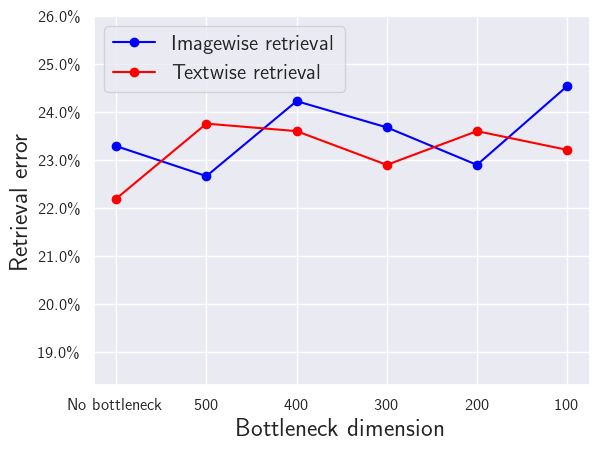

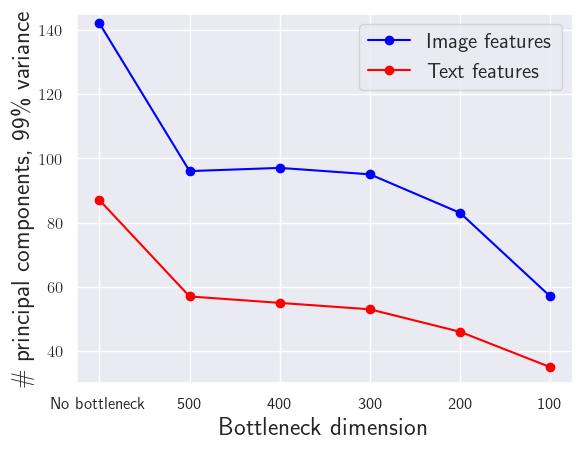

In [56]:
### bottleneck runs
data = [
    {'avg_pos_image_mlp': 0.16746012369791666, 'avg_pos_image_acts': 0.0343780517578125, 'n_image_acts_activated_more_than_on_10p_inputs': 0.044270833333333336, 'n_image_acts_activated_more_than_on_1p_inputs': 0.7174479166666666, 'n_image_acts_activated_more_than_on_0p_inputs': 0.8984375, 'n_highly_corr_image_acts': 1, 'n_highly_corr_final_image_embeddings': 0, 'test_image_rank_99p_preatt': 137, 'test_image_rank_99p_att': 102, 'test_image_rank_99p_premlp': 147, 'test_image_rank_99p_pregelu': 113, 'test_image_rank_99p_gelu': 440, 'test_image_rank_99p_mlp': 123, 'test_image_rank_99p_res': 157, 'test_image_prehead_rank_99p': 156, 'test_text_prehead_rank_99p': 74, 'test_image_rank_99p': 57, 'test_text_rank_99p': 35, 'test_imagewise_acc': 75.46875, 'test_textwise_acc': 76.796875, 'weight_matrix_ranks': [183, 181, 184, 183, 183, 184, 183, 183], 'rho': '0.0', 'split': 'test', 'return_layer': 12, 'bottleneck_dim': '100'},
    {'avg_pos_image_mlp': 0.1583740234375, 'avg_pos_image_acts': 0.028006998697916667, 'n_image_acts_activated_more_than_on_10p_inputs': 0.032552083333333336, 'n_image_acts_activated_more_than_on_1p_inputs': 0.6236979166666666, 'n_image_acts_activated_more_than_on_0p_inputs': 0.8619791666666666, 'n_highly_corr_image_acts': 0, 'n_highly_corr_final_image_embeddings': 0, 'test_image_rank_99p_preatt': 136, 'test_image_rank_99p_att': 102, 'test_image_rank_99p_premlp': 148, 'test_image_rank_99p_pregelu': 121, 'test_image_rank_99p_gelu': 429, 'test_image_rank_99p_mlp': 119, 'test_image_rank_99p_res': 160, 'test_image_prehead_rank_99p': 161, 'test_text_prehead_rank_99p': 123, 'test_image_rank_99p': 83, 'test_text_rank_99p': 46, 'test_imagewise_acc': 77.109375, 'test_textwise_acc': 76.40625, 'weight_matrix_ranks': [183, 181, 184, 183, 183, 184, 183, 183], 'rho': '0.0', 'split': 'test', 'return_layer': 12, 'bottleneck_dim': '200'},
    {'avg_pos_image_mlp': 0.17878824869791668, 'avg_pos_image_acts': 0.0296661376953125, 'n_image_acts_activated_more_than_on_10p_inputs': 0.028645833333333332, 'n_image_acts_activated_more_than_on_1p_inputs': 0.671875, 'n_image_acts_activated_more_than_on_0p_inputs': 0.8828125, 'n_highly_corr_image_acts': 0, 'n_highly_corr_final_image_embeddings': 0, 'test_image_rank_99p_preatt': 138, 'test_image_rank_99p_att': 105, 'test_image_rank_99p_premlp': 150, 'test_image_rank_99p_pregelu': 122, 'test_image_rank_99p_gelu': 439, 'test_image_rank_99p_mlp': 119, 'test_image_rank_99p_res': 162, 'test_image_prehead_rank_99p': 163, 'test_text_prehead_rank_99p': 142, 'test_image_rank_99p': 95, 'test_text_rank_99p': 53, 'test_imagewise_acc': 76.328125, 'test_textwise_acc': 77.109375, 'weight_matrix_ranks': [183, 181, 184, 183, 183, 184, 183, 184], 'rho': '0.0', 'split': 'test', 'return_layer': 12, 'bottleneck_dim': '300'},
    {'avg_pos_image_mlp': 0.18702392578125, 'avg_pos_image_acts': 0.028801472981770833, 'n_image_acts_activated_more_than_on_10p_inputs': 0.029947916666666668, 'n_image_acts_activated_more_than_on_1p_inputs': 0.6484375, 'n_image_acts_activated_more_than_on_0p_inputs': 0.88671875, 'n_highly_corr_image_acts': 0, 'n_highly_corr_final_image_embeddings': 0, 'test_image_rank_99p_preatt': 138, 'test_image_rank_99p_att': 105, 'test_image_rank_99p_premlp': 150, 'test_image_rank_99p_pregelu': 124, 'test_image_rank_99p_gelu': 439, 'test_image_rank_99p_mlp': 117, 'test_image_rank_99p_res': 163, 'test_image_prehead_rank_99p': 163, 'test_text_prehead_rank_99p': 148, 'test_image_rank_99p': 97, 'test_text_rank_99p': 55, 'test_imagewise_acc': 75.78125, 'test_textwise_acc': 76.40625, 'weight_matrix_ranks': [183, 181, 184, 183, 183, 184, 183, 183], 'rho': '0.0', 'split': 'test', 'return_layer': 12, 'bottleneck_dim': '400'},
    {'avg_pos_image_mlp': 0.17305501302083334, 'avg_pos_image_acts': 0.028339640299479166, 'n_image_acts_activated_more_than_on_10p_inputs': 0.03125, 'n_image_acts_activated_more_than_on_1p_inputs': 0.625, 'n_image_acts_activated_more_than_on_0p_inputs': 0.8815104166666666, 'n_highly_corr_image_acts': 0, 'n_highly_corr_final_image_embeddings': 0, 'test_image_rank_99p_preatt': 138, 'test_image_rank_99p_att': 104, 'test_image_rank_99p_premlp': 150, 'test_image_rank_99p_pregelu': 124, 'test_image_rank_99p_gelu': 434, 'test_image_rank_99p_mlp': 118, 'test_image_rank_99p_res': 163, 'test_image_prehead_rank_99p': 163, 'test_text_prehead_rank_99p': 167, 'test_image_rank_99p': 96, 'test_text_rank_99p': 57, 'test_imagewise_acc': 77.34375, 'test_textwise_acc': 76.25, 'weight_matrix_ranks': [183, 181, 184, 183, 183, 184, 183, 183], 'rho': '0.0', 'split': 'test', 'return_layer': 12, 'bottleneck_dim': '500'},
    {'avg_pos_image_mlp': 0.18177083333333333, 'avg_pos_image_acts': 0.027635701497395835, 'n_image_acts_activated_more_than_on_10p_inputs': 0.02734375, 'n_image_acts_activated_more_than_on_1p_inputs': 0.6041666666666666, 'n_image_acts_activated_more_than_on_0p_inputs': 0.8567708333333334, 'n_highly_corr_image_acts': 0, 'n_highly_corr_final_image_embeddings': 0, 'test_image_rank_99p_preatt': 135, 'test_image_rank_99p_att': 102, 'test_image_rank_99p_premlp': 148, 'test_image_rank_99p_pregelu': 122, 'test_image_rank_99p_gelu': 421, 'test_image_rank_99p_mlp': 112, 'test_image_rank_99p_res': 161, 'test_image_prehead_rank_99p': 163, 'test_text_prehead_rank_99p': 196, 'test_image_rank_99p': 142, 'test_text_rank_99p': 87, 'test_imagewise_acc': 76.71875, 'test_textwise_acc': 77.8125, 'weight_matrix_ranks': [183, 181, 184, 183, 183, 184, 183, 183], 'rho': '0.0', 'split': 'test', 'return_layer': 12, 'bottleneck_dim': 'No bottleneck'},
]

df = pd.DataFrame(data)

plt.plot(df['bottleneck_dim'], 100-df['test_imagewise_acc'], marker='o', label='Imagewise retrieval', color='blue') 
plt.plot(df['bottleneck_dim'], 100-df['test_textwise_acc'], marker='o', label='Textwise retrieval', color='red') 
# plt.gca().set_xscale('log')
plt.ylim(18.3, 26)
plt.gca().invert_xaxis()
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=1))
plt.xlabel('Bottleneck dimension', fontsize=label_size)
plt.ylabel('Retrieval error', fontsize=label_size)
plt.legend(fontsize=label_size*0.85)
plt.savefig("plots/clip_wrt_bottleneck_dim-err.pdf", bbox_inches='tight')
plt.show()

# plt.plot(df['rho'], df['test_image_rank_99p_gelu'], marker='o', label='Image features after GELU', color='cornflowerblue') 
plt.plot(df['bottleneck_dim'], df['test_image_rank_99p'], marker='o', label='Image features', color='blue') 
plt.plot(df['bottleneck_dim'], df['test_text_rank_99p'], marker='o', label='Text features', color='red') 
# plt.gca().set_xscale('log')
plt.ylim(30, 145)
plt.gca().invert_xaxis()
plt.xlabel('Bottleneck dimension', fontsize=label_size)
plt.ylabel('\# principal components, 99\% variance', fontsize=label_size)
plt.legend(fontsize=label_size*0.85)
plt.savefig("plots/clip_wrt_bottleneck_dim-rank.pdf", bbox_inches='tight')
plt.show()

In [43]:
# [unfrozen text encoder] 10 * 128 examples, act_threshold = acts_left_last.max() // 10, token_embedding_to_take = 0
data = [
    {'avg_pos_image_mlp': 0.34401041666666665, 'avg_pos_image_acts': 0.0188323974609375, 'n_image_acts_activated_more_than_on_10p_inputs': 0.041666666666666664, 'n_image_acts_activated_more_than_on_1p_inputs': 0.09505208333333333, 'n_image_acts_activated_more_than_on_0p_inputs': 0.14973958333333334, 'n_highly_corr_image_acts': 0, 'n_highly_corr_final_image_embeddings': 0, 'test_image_rank_99p_preatt': 2, 'test_image_rank_99p_att': 21, 'test_image_rank_99p_premlp': 1, 'test_image_rank_99p_pregelu': 2, 'test_image_rank_99p_gelu': 26, 'test_image_rank_99p_mlp': 2, 'test_image_rank_99p_res': 1, 'test_image_prehead_rank_99p': 163, 'test_text_prehead_rank_99p': 196, 'test_image_rank_99p': 142, 'test_text_rank_99p': 87, 'test_imagewise_acc': 76.71875, 'test_textwise_acc': 77.8125, 'weight_matrix_ranks': [183, 181, 184, 183, 183, 184, 183, 183], 'rho': '0.0', 'split': 'test', 'return_layer': 2},
    {'avg_pos_image_mlp': 0.3256022135416667, 'avg_pos_image_acts': 0.012639363606770834, 'n_image_acts_activated_more_than_on_10p_inputs': 0.028645833333333332, 'n_image_acts_activated_more_than_on_1p_inputs': 0.06770833333333333, 'n_image_acts_activated_more_than_on_0p_inputs': 0.13541666666666666, 'n_highly_corr_image_acts': 2, 'n_highly_corr_final_image_embeddings': 0, 'test_image_rank_99p_preatt': 2, 'test_image_rank_99p_att': 20, 'test_image_rank_99p_premlp': 1, 'test_image_rank_99p_pregelu': 1, 'test_image_rank_99p_gelu': 23, 'test_image_rank_99p_mlp': 1, 'test_image_rank_99p_res': 1, 'test_image_prehead_rank_99p': 155, 'test_text_prehead_rank_99p': 131, 'test_image_rank_99p': 139, 'test_text_rank_99p': 81, 'test_imagewise_acc': 81.40625, 'test_textwise_acc': 80.46875, 'weight_matrix_ranks': [183, 181, 184, 183, 183, 184, 183, 184], 'rho': '0.1', 'split': 'test', 'return_layer': 2},
    {'avg_pos_image_mlp': 0.3176961263020833, 'avg_pos_image_acts': 0.00928955078125, 'n_image_acts_activated_more_than_on_10p_inputs': 0.0234375, 'n_image_acts_activated_more_than_on_1p_inputs': 0.06901041666666667, 'n_image_acts_activated_more_than_on_0p_inputs': 0.12760416666666666, 'n_highly_corr_image_acts': 1, 'n_highly_corr_final_image_embeddings': 0, 'test_image_rank_99p_preatt': 3, 'test_image_rank_99p_att': 22, 'test_image_rank_99p_premlp': 1, 'test_image_rank_99p_pregelu': 1, 'test_image_rank_99p_gelu': 26, 'test_image_rank_99p_mlp': 1, 'test_image_rank_99p_res': 1, 'test_image_prehead_rank_99p': 147, 'test_text_prehead_rank_99p': 87, 'test_image_rank_99p': 127, 'test_text_rank_99p': 69, 'test_imagewise_acc': 80.9375, 'test_textwise_acc': 80.46875, 'weight_matrix_ranks': [183, 181, 184, 183, 183, 184, 183, 183], 'rho': '0.2', 'split': 'test', 'return_layer': 2},
    {'avg_pos_image_mlp': 0.2958170572916667, 'avg_pos_image_acts': 0.009697469075520833, 'n_image_acts_activated_more_than_on_10p_inputs': 0.0234375, 'n_image_acts_activated_more_than_on_1p_inputs': 0.0546875, 'n_image_acts_activated_more_than_on_0p_inputs': 0.10677083333333333, 'n_highly_corr_image_acts': 0, 'n_highly_corr_final_image_embeddings': 0, 'test_image_rank_99p_preatt': 3, 'test_image_rank_99p_att': 22, 'test_image_rank_99p_premlp': 1, 'test_image_rank_99p_pregelu': 2, 'test_image_rank_99p_gelu': 25, 'test_image_rank_99p_mlp': 2, 'test_image_rank_99p_res': 1, 'test_image_prehead_rank_99p': 142, 'test_text_prehead_rank_99p': 75, 'test_image_rank_99p': 118, 'test_text_rank_99p': 62, 'test_imagewise_acc': 80.078125, 'test_textwise_acc': 80.78125, 'weight_matrix_ranks': [183, 181, 184, 183, 183, 184, 183, 183], 'rho': '0.25', 'split': 'test', 'return_layer': 2},
    {'avg_pos_image_mlp': 0.35718180338541666, 'avg_pos_image_acts': 0.025142415364583334, 'n_image_acts_activated_more_than_on_10p_inputs': 0.052083333333333336, 'n_image_acts_activated_more_than_on_1p_inputs': 0.1015625, 'n_image_acts_activated_more_than_on_0p_inputs': 0.15104166666666666, 'n_highly_corr_image_acts': 2, 'n_highly_corr_final_image_embeddings': 0, 'test_image_rank_99p_preatt': 3, 'test_image_rank_99p_att': 29, 'test_image_rank_99p_premlp': 1, 'test_image_rank_99p_pregelu': 2, 'test_image_rank_99p_gelu': 28, 'test_image_rank_99p_mlp': 2, 'test_image_rank_99p_res': 1, 'test_image_prehead_rank_99p': 110, 'test_text_prehead_rank_99p': 36, 'test_image_rank_99p': 68, 'test_text_rank_99p': 32, 'test_imagewise_acc': 74.0625, 'test_textwise_acc': 74.84375, 'weight_matrix_ranks': [183, 181, 184, 183, 183, 183, 183, 183], 'rho': '0.3', 'split': 'test', 'return_layer': 2},
    {'avg_pos_image_mlp': 0.22488199869791667, 'avg_pos_image_acts': 0.03443603515625, 'n_image_acts_activated_more_than_on_10p_inputs': 0.09244791666666667, 'n_image_acts_activated_more_than_on_1p_inputs': 0.2421875, 'n_image_acts_activated_more_than_on_0p_inputs': 0.3697916666666667, 'n_highly_corr_image_acts': 0, 'n_highly_corr_final_image_embeddings': 0, 'test_image_rank_99p_preatt': 5, 'test_image_rank_99p_att': 67, 'test_image_rank_99p_premlp': 15, 'test_image_rank_99p_pregelu': 19, 'test_image_rank_99p_gelu': 109, 'test_image_rank_99p_mlp': 34, 'test_image_rank_99p_res': 10, 'test_image_prehead_rank_99p': 163, 'test_text_prehead_rank_99p': 196, 'test_image_rank_99p': 142, 'test_text_rank_99p': 87, 'test_imagewise_acc': 76.71875, 'test_textwise_acc': 77.8125, 'weight_matrix_ranks': [183, 181, 184, 183, 183, 184, 183, 183], 'rho': '0.0', 'split': 'test', 'return_layer': 4},
    {'avg_pos_image_mlp': 0.25211181640625, 'avg_pos_image_acts': 0.025706990559895834, 'n_image_acts_activated_more_than_on_10p_inputs': 0.08854166666666667, 'n_image_acts_activated_more_than_on_1p_inputs': 0.234375, 'n_image_acts_activated_more_than_on_0p_inputs': 0.3580729166666667, 'n_highly_corr_image_acts': 0, 'n_highly_corr_final_image_embeddings': 0, 'test_image_rank_99p_preatt': 4, 'test_image_rank_99p_att': 68, 'test_image_rank_99p_premlp': 13, 'test_image_rank_99p_pregelu': 17, 'test_image_rank_99p_gelu': 113, 'test_image_rank_99p_mlp': 29, 'test_image_rank_99p_res': 8, 'test_image_prehead_rank_99p': 155, 'test_text_prehead_rank_99p': 131, 'test_image_rank_99p': 139, 'test_text_rank_99p': 81, 'test_imagewise_acc': 81.40625, 'test_textwise_acc': 80.46875, 'weight_matrix_ranks': [183, 181, 184, 183, 183, 184, 183, 184], 'rho': '0.1', 'split': 'test', 'return_layer': 4},
    {'avg_pos_image_mlp': 0.25248616536458335, 'avg_pos_image_acts': 0.021431477864583333, 'n_image_acts_activated_more_than_on_10p_inputs': 0.06380208333333333, 'n_image_acts_activated_more_than_on_1p_inputs': 0.2265625, 'n_image_acts_activated_more_than_on_0p_inputs': 0.359375, 'n_highly_corr_image_acts': 0, 'n_highly_corr_final_image_embeddings': 0, 'test_image_rank_99p_preatt': 4, 'test_image_rank_99p_att': 67, 'test_image_rank_99p_premlp': 12, 'test_image_rank_99p_pregelu': 17, 'test_image_rank_99p_gelu': 116, 'test_image_rank_99p_mlp': 26, 'test_image_rank_99p_res': 8, 'test_image_prehead_rank_99p': 147, 'test_text_prehead_rank_99p': 87, 'test_image_rank_99p': 127, 'test_text_rank_99p': 69, 'test_imagewise_acc': 80.9375, 'test_textwise_acc': 80.46875, 'weight_matrix_ranks': [183, 181, 184, 183, 183, 184, 183, 183], 'rho': '0.2', 'split': 'test', 'return_layer': 4},
    {'avg_pos_image_mlp': 0.24619547526041666, 'avg_pos_image_acts': 0.018517049153645833, 'n_image_acts_activated_more_than_on_10p_inputs': 0.057291666666666664, 'n_image_acts_activated_more_than_on_1p_inputs': 0.21614583333333334, 'n_image_acts_activated_more_than_on_0p_inputs': 0.3424479166666667, 'n_highly_corr_image_acts': 0, 'n_highly_corr_final_image_embeddings': 0, 'test_image_rank_99p_preatt': 5, 'test_image_rank_99p_att': 69, 'test_image_rank_99p_premlp': 13, 'test_image_rank_99p_pregelu': 19, 'test_image_rank_99p_gelu': 122, 'test_image_rank_99p_mlp': 27, 'test_image_rank_99p_res': 9, 'test_image_prehead_rank_99p': 142, 'test_text_prehead_rank_99p': 75, 'test_image_rank_99p': 118, 'test_text_rank_99p': 62, 'test_imagewise_acc': 80.078125, 'test_textwise_acc': 80.78125, 'weight_matrix_ranks': [183, 181, 184, 183, 183, 184, 183, 183], 'rho': '0.25', 'split': 'test', 'return_layer': 4},
    {'avg_pos_image_mlp': 0.2072998046875, 'avg_pos_image_acts': 0.016813151041666665, 'n_image_acts_activated_more_than_on_10p_inputs': 0.052083333333333336, 'n_image_acts_activated_more_than_on_1p_inputs': 0.171875, 'n_image_acts_activated_more_than_on_0p_inputs': 0.30859375, 'n_highly_corr_image_acts': 0, 'n_highly_corr_final_image_embeddings': 0, 'test_image_rank_99p_preatt': 5, 'test_image_rank_99p_att': 72, 'test_image_rank_99p_premlp': 12, 'test_image_rank_99p_pregelu': 19, 'test_image_rank_99p_gelu': 109, 'test_image_rank_99p_mlp': 23, 'test_image_rank_99p_res': 8, 'test_image_prehead_rank_99p': 110, 'test_text_prehead_rank_99p': 36, 'test_image_rank_99p': 68, 'test_text_rank_99p': 32, 'test_imagewise_acc': 74.0625, 'test_textwise_acc': 74.84375, 'weight_matrix_ranks': [183, 181, 184, 183, 183, 183, 183, 183], 'rho': '0.3', 'split': 'test', 'return_layer': 4},

    {'avg_pos_image_mlp': 0.14218343098958333, 'avg_pos_image_acts': 0.019840494791666666, 'n_image_acts_activated_more_than_on_10p_inputs': 0.05859375, 'n_image_acts_activated_more_than_on_1p_inputs': 0.2747395833333333, 'n_image_acts_activated_more_than_on_0p_inputs': 0.3854166666666667, 'n_highly_corr_image_acts': 0, 'n_highly_corr_final_image_embeddings': 0, 'test_image_rank_99p_preatt': 15, 'test_image_rank_99p_att': 68, 'test_image_rank_99p_premlp': 45, 'test_image_rank_99p_pregelu': 34, 'test_image_rank_99p_gelu': 198, 'test_image_rank_99p_mlp': 61, 'test_image_rank_99p_res': 23, 'test_image_prehead_rank_99p': 163, 'test_text_prehead_rank_99p': 196, 'test_image_rank_99p': 142, 'test_text_rank_99p': 87, 'test_imagewise_acc': 76.71875, 'test_textwise_acc': 77.8125, 'weight_matrix_ranks': [183, 181, 184, 183, 183, 184, 183, 183], 'rho': '0.0', 'split': 'test', 'return_layer': 6},
    {'avg_pos_image_mlp': 0.19839680989583333, 'avg_pos_image_acts': 0.025470987955729166, 'n_image_acts_activated_more_than_on_10p_inputs': 0.07942708333333333, 'n_image_acts_activated_more_than_on_1p_inputs': 0.3203125, 'n_image_acts_activated_more_than_on_0p_inputs': 0.3997395833333333, 'n_highly_corr_image_acts': 0, 'n_highly_corr_final_image_embeddings': 0, 'test_image_rank_99p_preatt': 13, 'test_image_rank_99p_att': 69, 'test_image_rank_99p_premlp': 35, 'test_image_rank_99p_pregelu': 30, 'test_image_rank_99p_gelu': 190, 'test_image_rank_99p_mlp': 49, 'test_image_rank_99p_res': 19, 'test_image_prehead_rank_99p': 155, 'test_text_prehead_rank_99p': 131, 'test_image_rank_99p': 139, 'test_text_rank_99p': 81, 'test_imagewise_acc': 81.40625, 'test_textwise_acc': 80.46875, 'weight_matrix_ranks': [183, 181, 184, 183, 183, 184, 183, 184], 'rho': '0.1', 'split': 'test', 'return_layer': 6},
    {'avg_pos_image_mlp': 0.21717936197916668, 'avg_pos_image_acts': 0.029615275065104165, 'n_image_acts_activated_more_than_on_10p_inputs': 0.109375, 'n_image_acts_activated_more_than_on_1p_inputs': 0.3333333333333333, 'n_image_acts_activated_more_than_on_0p_inputs': 0.41015625, 'n_highly_corr_image_acts': 0, 'n_highly_corr_final_image_embeddings': 0, 'test_image_rank_99p_preatt': 13, 'test_image_rank_99p_att': 71, 'test_image_rank_99p_premlp': 33, 'test_image_rank_99p_pregelu': 30, 'test_image_rank_99p_gelu': 193, 'test_image_rank_99p_mlp': 46, 'test_image_rank_99p_res': 19, 'test_image_prehead_rank_99p': 147, 'test_text_prehead_rank_99p': 87, 'test_image_rank_99p': 127, 'test_text_rank_99p': 69, 'test_imagewise_acc': 80.9375, 'test_textwise_acc': 80.46875, 'weight_matrix_ranks': [183, 181, 184, 183, 183, 184, 183, 183], 'rho': '0.2', 'split': 'test', 'return_layer': 6},
    {'avg_pos_image_mlp': 0.19020589192708334, 'avg_pos_image_acts': 0.021758015950520834, 'n_image_acts_activated_more_than_on_10p_inputs': 0.0703125, 'n_image_acts_activated_more_than_on_1p_inputs': 0.2942708333333333, 'n_image_acts_activated_more_than_on_0p_inputs': 0.390625, 'n_highly_corr_image_acts': 0, 'n_highly_corr_final_image_embeddings': 0, 'test_image_rank_99p_preatt': 14, 'test_image_rank_99p_att': 72, 'test_image_rank_99p_premlp': 34, 'test_image_rank_99p_pregelu': 31, 'test_image_rank_99p_gelu': 199, 'test_image_rank_99p_mlp': 45, 'test_image_rank_99p_res': 20, 'test_image_prehead_rank_99p': 142, 'test_text_prehead_rank_99p': 75, 'test_image_rank_99p': 118, 'test_text_rank_99p': 62, 'test_imagewise_acc': 80.078125, 'test_textwise_acc': 80.78125, 'weight_matrix_ranks': [183, 181, 184, 183, 183, 184, 183, 183], 'rho': '0.25', 'split': 'test', 'return_layer': 6},
    {'avg_pos_image_mlp': 0.17196044921875, 'avg_pos_image_acts': 0.0173583984375, 'n_image_acts_activated_more_than_on_10p_inputs': 0.045572916666666664, 'n_image_acts_activated_more_than_on_1p_inputs': 0.23958333333333334, 'n_image_acts_activated_more_than_on_0p_inputs': 0.3776041666666667, 'n_highly_corr_image_acts': 0, 'n_highly_corr_final_image_embeddings': 0, 'test_image_rank_99p_preatt': 14, 'test_image_rank_99p_att': 77, 'test_image_rank_99p_premlp': 33, 'test_image_rank_99p_pregelu': 33, 'test_image_rank_99p_gelu': 194, 'test_image_rank_99p_mlp': 37, 'test_image_rank_99p_res': 21, 'test_image_prehead_rank_99p': 110, 'test_text_prehead_rank_99p': 36, 'test_image_rank_99p': 68, 'test_text_rank_99p': 32, 'test_imagewise_acc': 74.0625, 'test_textwise_acc': 74.84375, 'weight_matrix_ranks': [183, 181, 184, 183, 183, 183, 183, 183], 'rho': '0.3', 'split': 'test', 'return_layer': 6},
    {'avg_pos_image_mlp': 0.07191975911458333, 'avg_pos_image_acts': 0.015081787109375, 'n_image_acts_activated_more_than_on_10p_inputs': 0.02734375, 'n_image_acts_activated_more_than_on_1p_inputs': 0.3033854166666667, 'n_image_acts_activated_more_than_on_0p_inputs': 0.5247395833333334, 'n_highly_corr_image_acts': 0, 'n_highly_corr_final_image_embeddings': 0, 'test_image_rank_99p_preatt': 34, 'test_image_rank_99p_att': 101, 'test_image_rank_99p_premlp': 72, 'test_image_rank_99p_pregelu': 80, 'test_image_rank_99p_gelu': 346, 'test_image_rank_99p_mlp': 106, 'test_image_rank_99p_res': 54, 'test_image_prehead_rank_99p': 163, 'test_text_prehead_rank_99p': 196, 'test_image_rank_99p': 142, 'test_text_rank_99p': 87, 'test_imagewise_acc': 76.71875, 'test_textwise_acc': 77.8125, 'weight_matrix_ranks': [183, 181, 184, 183, 183, 184, 183, 183], 'rho': '0.0', 'split': 'test', 'return_layer': 8},
    {'avg_pos_image_mlp': 0.08094075520833334, 'avg_pos_image_acts': 0.012690226236979166, 'n_image_acts_activated_more_than_on_10p_inputs': 0.013020833333333334, 'n_image_acts_activated_more_than_on_1p_inputs': 0.2955729166666667, 'n_image_acts_activated_more_than_on_0p_inputs': 0.51953125, 'n_highly_corr_image_acts': 0, 'n_highly_corr_final_image_embeddings': 0, 'test_image_rank_99p_preatt': 27, 'test_image_rank_99p_att': 96, 'test_image_rank_99p_premlp': 58, 'test_image_rank_99p_pregelu': 71, 'test_image_rank_99p_gelu': 340, 'test_image_rank_99p_mlp': 89, 'test_image_rank_99p_res': 43, 'test_image_prehead_rank_99p': 155, 'test_text_prehead_rank_99p': 131, 'test_image_rank_99p': 139, 'test_text_rank_99p': 81, 'test_imagewise_acc': 81.40625, 'test_textwise_acc': 80.46875, 'weight_matrix_ranks': [183, 181, 184, 183, 183, 184, 183, 184], 'rho': '0.1', 'split': 'test', 'return_layer': 8},
    {'avg_pos_image_mlp': 0.10314534505208334, 'avg_pos_image_acts': 0.014864095052083333, 'n_image_acts_activated_more_than_on_10p_inputs': 0.015625, 'n_image_acts_activated_more_than_on_1p_inputs': 0.3229166666666667, 'n_image_acts_activated_more_than_on_0p_inputs': 0.5390625, 'n_highly_corr_image_acts': 0, 'n_highly_corr_final_image_embeddings': 0, 'test_image_rank_99p_preatt': 28, 'test_image_rank_99p_att': 93, 'test_image_rank_99p_premlp': 55, 'test_image_rank_99p_pregelu': 68, 'test_image_rank_99p_gelu': 345, 'test_image_rank_99p_mlp': 85, 'test_image_rank_99p_res': 42, 'test_image_prehead_rank_99p': 147, 'test_text_prehead_rank_99p': 87, 'test_image_rank_99p': 127, 'test_text_rank_99p': 69, 'test_imagewise_acc': 80.9375, 'test_textwise_acc': 80.46875, 'weight_matrix_ranks': [183, 181, 184, 183, 183, 184, 183, 183], 'rho': '0.2', 'split': 'test', 'return_layer': 8},
    {'avg_pos_image_mlp': 0.07739664713541666, 'avg_pos_image_acts': 0.012227376302083334, 'n_image_acts_activated_more_than_on_10p_inputs': 0.01171875, 'n_image_acts_activated_more_than_on_1p_inputs': 0.296875, 'n_image_acts_activated_more_than_on_0p_inputs': 0.5481770833333334, 'n_highly_corr_image_acts': 0, 'n_highly_corr_final_image_embeddings': 0, 'test_image_rank_99p_preatt': 29, 'test_image_rank_99p_att': 91, 'test_image_rank_99p_premlp': 55, 'test_image_rank_99p_pregelu': 68, 'test_image_rank_99p_gelu': 349, 'test_image_rank_99p_mlp': 87, 'test_image_rank_99p_res': 44, 'test_image_prehead_rank_99p': 142, 'test_text_prehead_rank_99p': 75, 'test_image_rank_99p': 118, 'test_text_rank_99p': 62, 'test_imagewise_acc': 80.078125, 'test_textwise_acc': 80.78125, 'weight_matrix_ranks': [183, 181, 184, 183, 183, 184, 183, 183], 'rho': '0.25', 'split': 'test', 'return_layer': 8},
    {'avg_pos_image_mlp': 0.1267578125, 'avg_pos_image_acts': 0.016972859700520832, 'n_image_acts_activated_more_than_on_10p_inputs': 0.032552083333333336, 'n_image_acts_activated_more_than_on_1p_inputs': 0.3502604166666667, 'n_image_acts_activated_more_than_on_0p_inputs': 0.5989583333333334, 'n_highly_corr_image_acts': 0, 'n_highly_corr_final_image_embeddings': 0, 'test_image_rank_99p_preatt': 29, 'test_image_rank_99p_att': 86, 'test_image_rank_99p_premlp': 50, 'test_image_rank_99p_pregelu': 63, 'test_image_rank_99p_gelu': 337, 'test_image_rank_99p_mlp': 82, 'test_image_rank_99p_res': 41, 'test_image_prehead_rank_99p': 110, 'test_text_prehead_rank_99p': 36, 'test_image_rank_99p': 68, 'test_text_rank_99p': 32, 'test_imagewise_acc': 74.0625, 'test_textwise_acc': 74.84375, 'weight_matrix_ranks': [183, 181, 184, 183, 183, 183, 183, 183], 'rho': '0.3', 'split': 'test', 'return_layer': 8},

    {'avg_pos_image_mlp': 0.0761962890625, 'avg_pos_image_acts': 0.015093994140625, 'n_image_acts_activated_more_than_on_10p_inputs': 0.010416666666666666, 'n_image_acts_activated_more_than_on_1p_inputs': 0.4453125, 'n_image_acts_activated_more_than_on_0p_inputs': 0.8450520833333334, 'n_highly_corr_image_acts': 0, 'n_highly_corr_final_image_embeddings': 0, 'test_image_rank_99p_preatt': 83, 'test_image_rank_99p_att': 112, 'test_image_rank_99p_premlp': 111, 'test_image_rank_99p_pregelu': 132, 'test_image_rank_99p_gelu': 511, 'test_image_rank_99p_mlp': 145, 'test_image_rank_99p_res': 119, 'test_image_prehead_rank_99p': 163, 'test_text_prehead_rank_99p': 196, 'test_image_rank_99p': 142, 'test_text_rank_99p': 87, 'test_imagewise_acc': 76.71875, 'test_textwise_acc': 77.8125, 'weight_matrix_ranks': [183, 181, 184, 183, 183, 184, 183, 183], 'rho': '0.0', 'split': 'test', 'return_layer': 10},
    {'avg_pos_image_mlp': 0.09486083984375, 'avg_pos_image_acts': 0.015032958984375, 'n_image_acts_activated_more_than_on_10p_inputs': 0.00390625, 'n_image_acts_activated_more_than_on_1p_inputs': 0.46484375, 'n_image_acts_activated_more_than_on_0p_inputs': 0.8541666666666666, 'n_highly_corr_image_acts': 0, 'n_highly_corr_final_image_embeddings': 0, 'test_image_rank_99p_preatt': 71, 'test_image_rank_99p_att': 109, 'test_image_rank_99p_premlp': 98, 'test_image_rank_99p_pregelu': 123, 'test_image_rank_99p_gelu': 511, 'test_image_rank_99p_mlp': 140, 'test_image_rank_99p_res': 104, 'test_image_prehead_rank_99p': 155, 'test_text_prehead_rank_99p': 131, 'test_image_rank_99p': 139, 'test_text_rank_99p': 81, 'test_imagewise_acc': 81.40625, 'test_textwise_acc': 80.46875, 'weight_matrix_ranks': [183, 181, 184, 183, 183, 184, 183, 184], 'rho': '0.1', 'split': 'test', 'return_layer': 10},
    {'avg_pos_image_mlp': 0.090869140625, 'avg_pos_image_acts': 0.015135701497395833, 'n_image_acts_activated_more_than_on_10p_inputs': 0.0026041666666666665, 'n_image_acts_activated_more_than_on_1p_inputs': 0.4752604166666667, 'n_image_acts_activated_more_than_on_0p_inputs': 0.8723958333333334, 'n_highly_corr_image_acts': 0, 'n_highly_corr_final_image_embeddings': 0, 'test_image_rank_99p_preatt': 68, 'test_image_rank_99p_att': 105, 'test_image_rank_99p_premlp': 94, 'test_image_rank_99p_pregelu': 117, 'test_image_rank_99p_gelu': 510, 'test_image_rank_99p_mlp': 140, 'test_image_rank_99p_res': 101, 'test_image_prehead_rank_99p': 147, 'test_text_prehead_rank_99p': 87, 'test_image_rank_99p': 127, 'test_text_rank_99p': 69, 'test_imagewise_acc': 80.9375, 'test_textwise_acc': 80.46875, 'weight_matrix_ranks': [183, 181, 184, 183, 183, 184, 183, 183], 'rho': '0.2', 'split': 'test', 'return_layer': 10},
    {'avg_pos_image_mlp': 0.08044840494791666, 'avg_pos_image_acts': 0.015431722005208334, 'n_image_acts_activated_more_than_on_10p_inputs': 0.00390625, 'n_image_acts_activated_more_than_on_1p_inputs': 0.4817708333333333, 'n_image_acts_activated_more_than_on_0p_inputs': 0.89453125, 'n_highly_corr_image_acts': 0, 'n_highly_corr_final_image_embeddings': 0, 'test_image_rank_99p_preatt': 70, 'test_image_rank_99p_att': 103, 'test_image_rank_99p_premlp': 94, 'test_image_rank_99p_pregelu': 114, 'test_image_rank_99p_gelu': 507, 'test_image_rank_99p_mlp': 143, 'test_image_rank_99p_res': 101, 'test_image_prehead_rank_99p': 142, 'test_text_prehead_rank_99p': 75, 'test_image_rank_99p': 118, 'test_text_rank_99p': 62, 'test_imagewise_acc': 80.078125, 'test_textwise_acc': 80.78125, 'weight_matrix_ranks': [183, 181, 184, 183, 183, 184, 183, 183], 'rho': '0.25', 'split': 'test', 'return_layer': 10},
    {'avg_pos_image_mlp': 0.1408203125, 'avg_pos_image_acts': 0.0263702392578125, 'n_image_acts_activated_more_than_on_10p_inputs': 0.014322916666666666, 'n_image_acts_activated_more_than_on_1p_inputs': 0.6927083333333334, 'n_image_acts_activated_more_than_on_0p_inputs': 0.9296875, 'n_highly_corr_image_acts': 0, 'n_highly_corr_final_image_embeddings': 0, 'test_image_rank_99p_preatt': 64, 'test_image_rank_99p_att': 93, 'test_image_rank_99p_premlp': 83, 'test_image_rank_99p_pregelu': 97, 'test_image_rank_99p_gelu': 466, 'test_image_rank_99p_mlp': 137, 'test_image_rank_99p_res': 90, 'test_image_prehead_rank_99p': 110, 'test_text_prehead_rank_99p': 36, 'test_image_rank_99p': 68, 'test_text_rank_99p': 32, 'test_imagewise_acc': 74.0625, 'test_textwise_acc': 74.84375, 'weight_matrix_ranks': [183, 181, 184, 183, 183, 183, 183, 183], 'rho': '0.3', 'split': 'test', 'return_layer': 10},
    {'avg_pos_image_mlp': 0.18177083333333333, 'avg_pos_image_acts': 0.027635701497395835, 'n_image_acts_activated_more_than_on_10p_inputs': 0.02734375, 'n_image_acts_activated_more_than_on_1p_inputs': 0.6041666666666666, 'n_image_acts_activated_more_than_on_0p_inputs': 0.8567708333333334, 'n_highly_corr_image_acts': 0, 'n_highly_corr_final_image_embeddings': 0, 'test_image_rank_99p_preatt': 135, 'test_image_rank_99p_att': 102, 'test_image_rank_99p_premlp': 148, 'test_image_rank_99p_pregelu': 122, 'test_image_rank_99p_gelu': 421, 'test_image_rank_99p_mlp': 112, 'test_image_rank_99p_res': 161, 'test_image_prehead_rank_99p': 163, 'test_text_prehead_rank_99p': 196, 'test_image_rank_99p': 142, 'test_text_rank_99p': 87, 'test_imagewise_acc': 76.71875, 'test_textwise_acc': 77.8125, 'weight_matrix_ranks': [183, 181, 184, 183, 183, 184, 183, 183], 'rho': '0.0', 'split': 'test', 'return_layer': 12},
    {'avg_pos_image_mlp': 0.16430257161458334, 'avg_pos_image_acts': 0.0247589111328125, 'n_image_acts_activated_more_than_on_10p_inputs': 0.014322916666666666, 'n_image_acts_activated_more_than_on_1p_inputs': 0.6002604166666666, 'n_image_acts_activated_more_than_on_0p_inputs': 0.84765625, 'n_highly_corr_image_acts': 2, 'n_highly_corr_final_image_embeddings': 0, 'test_image_rank_99p_preatt': 124, 'test_image_rank_99p_att': 99, 'test_image_rank_99p_premlp': 138, 'test_image_rank_99p_pregelu': 117, 'test_image_rank_99p_gelu': 437, 'test_image_rank_99p_mlp': 111, 'test_image_rank_99p_res': 153, 'test_image_prehead_rank_99p': 155, 'test_text_prehead_rank_99p': 131, 'test_image_rank_99p': 139, 'test_text_rank_99p': 81, 'test_imagewise_acc': 81.40625, 'test_textwise_acc': 80.46875, 'weight_matrix_ranks': [183, 181, 184, 183, 183, 184, 183, 184], 'rho': '0.1', 'split': 'test', 'return_layer': 12},
    {'avg_pos_image_mlp': 0.11152750651041667, 'avg_pos_image_acts': 0.018845621744791666, 'n_image_acts_activated_more_than_on_10p_inputs': 0.005208333333333333, 'n_image_acts_activated_more_than_on_1p_inputs': 0.5442708333333334, 'n_image_acts_activated_more_than_on_0p_inputs': 0.8138020833333334, 'n_highly_corr_image_acts': 1, 'n_highly_corr_final_image_embeddings': 0, 'test_image_rank_99p_preatt': 120, 'test_image_rank_99p_att': 97, 'test_image_rank_99p_premlp': 133, 'test_image_rank_99p_pregelu': 108, 'test_image_rank_99p_gelu': 433, 'test_image_rank_99p_mlp': 113, 'test_image_rank_99p_res': 145, 'test_image_prehead_rank_99p': 147, 'test_text_prehead_rank_99p': 87, 'test_image_rank_99p': 127, 'test_text_rank_99p': 69, 'test_imagewise_acc': 80.9375, 'test_textwise_acc': 80.46875, 'weight_matrix_ranks': [183, 181, 184, 183, 183, 184, 183, 183], 'rho': '0.2', 'split': 'test', 'return_layer': 12},
    {'avg_pos_image_mlp': 0.1094482421875, 'avg_pos_image_acts': 0.01859130859375, 'n_image_acts_activated_more_than_on_10p_inputs': 0.006510416666666667, 'n_image_acts_activated_more_than_on_1p_inputs': 0.5611979166666666, 'n_image_acts_activated_more_than_on_0p_inputs': 0.8216145833333334, 'n_highly_corr_image_acts': 2, 'n_highly_corr_final_image_embeddings': 0, 'test_image_rank_99p_preatt': 119, 'test_image_rank_99p_att': 93, 'test_image_rank_99p_premlp': 130, 'test_image_rank_99p_pregelu': 103, 'test_image_rank_99p_gelu': 433, 'test_image_rank_99p_mlp': 112, 'test_image_rank_99p_res': 140, 'test_image_prehead_rank_99p': 142, 'test_text_prehead_rank_99p': 75, 'test_image_rank_99p': 118, 'test_text_rank_99p': 62, 'test_imagewise_acc': 80.078125, 'test_textwise_acc': 80.78125, 'weight_matrix_ranks': [183, 181, 184, 183, 183, 184, 183, 183], 'rho': '0.25', 'split': 'test', 'return_layer': 12},
    {'avg_pos_image_mlp': 0.20216064453125, 'avg_pos_image_acts': 0.03189900716145833, 'n_image_acts_activated_more_than_on_10p_inputs': 0.02734375, 'n_image_acts_activated_more_than_on_1p_inputs': 0.7291666666666666, 'n_image_acts_activated_more_than_on_0p_inputs': 0.88671875, 'n_highly_corr_image_acts': 1, 'n_highly_corr_final_image_embeddings': 0, 'test_image_rank_99p_preatt': 104, 'test_image_rank_99p_att': 73, 'test_image_rank_99p_premlp': 107, 'test_image_rank_99p_pregelu': 71, 'test_image_rank_99p_gelu': 403, 'test_image_rank_99p_mlp': 93, 'test_image_rank_99p_res': 110, 'test_image_prehead_rank_99p': 110, 'test_text_prehead_rank_99p': 36, 'test_image_rank_99p': 68, 'test_text_rank_99p': 32, 'test_imagewise_acc': 74.0625, 'test_textwise_acc': 74.84375, 'weight_matrix_ranks': [183, 181, 184, 183, 183, 183, 183, 183], 'rho': '0.3', 'split': 'test', 'return_layer': 12},
]
df = pd.DataFrame(data)
print(df['test_imagewise_acc'][0], df['test_textwise_acc'][0], df['test_imagewise_acc'].max(), df['test_textwise_acc'].max())

76.71875 77.8125 81.40625 80.78125


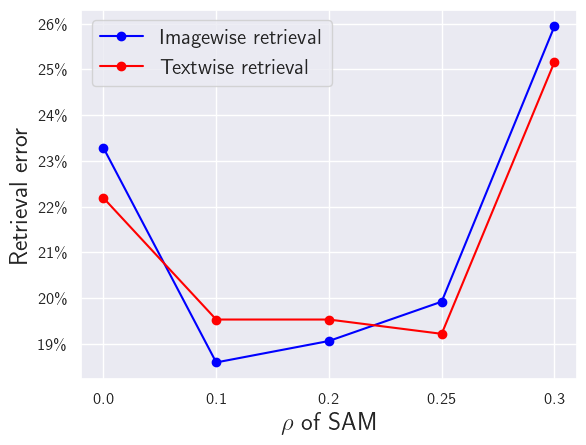

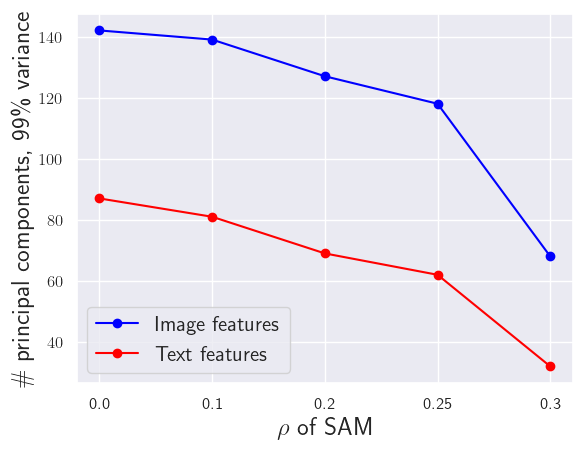

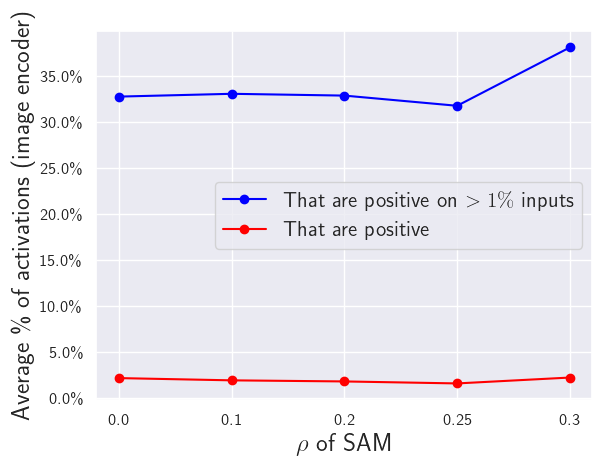

In [44]:
df = pd.DataFrame(data)
df = df.groupby(['rho']).mean().reset_index()

plt.plot(df['rho'], 100-df['test_imagewise_acc'], marker='o', label='Imagewise retrieval', color='blue') 
plt.plot(df['rho'], 100-df['test_textwise_acc'], marker='o', label='Textwise retrieval', color='red') 
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
plt.xlabel('$\\rho$ of SAM', fontsize=label_size)
plt.ylabel('Retrieval error', fontsize=label_size)
plt.legend(fontsize=label_size*0.85)
plt.savefig("plots/clip_wrt_rho-err.pdf", bbox_inches='tight')
plt.show()

# plt.plot(df['rho'], df['test_image_rank_99p_gelu'], marker='o', label='Image features after GELU', color='cornflowerblue') 
plt.plot(df['rho'], df['test_image_rank_99p'], marker='o', label='Image features', color='blue') 
plt.plot(df['rho'], df['test_text_rank_99p'], marker='o', label='Text features', color='red') 
plt.xlabel('$\\rho$ of SAM', fontsize=label_size)
plt.ylabel('\# principal components, 99\% variance', fontsize=label_size)
plt.legend(fontsize=label_size*0.85)
plt.savefig("plots/clip_wrt_rho-rank.pdf", bbox_inches='tight')
plt.show()

plt.plot(df['rho'], df['n_image_acts_activated_more_than_on_1p_inputs'], marker='o', label='That are positive on $>1\%$ inputs', color='blue') 
plt.plot(df['rho'], df['avg_pos_image_acts'], marker='o', label='That are positive', color='red') 
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=1))
plt.xlabel('$\\rho$ of SAM', fontsize=label_size)
plt.ylabel('Average \% of activations (image encoder)', fontsize=label_size)
plt.legend(fontsize=label_size*0.85)
plt.savefig("plots/clip_wrt_rho-act_metrics.pdf", bbox_inches='tight')
plt.show()


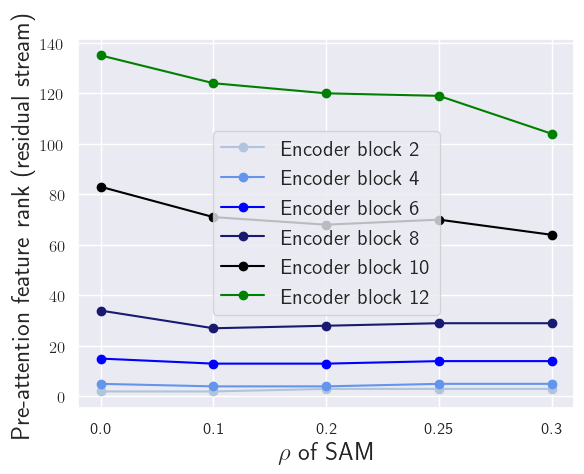

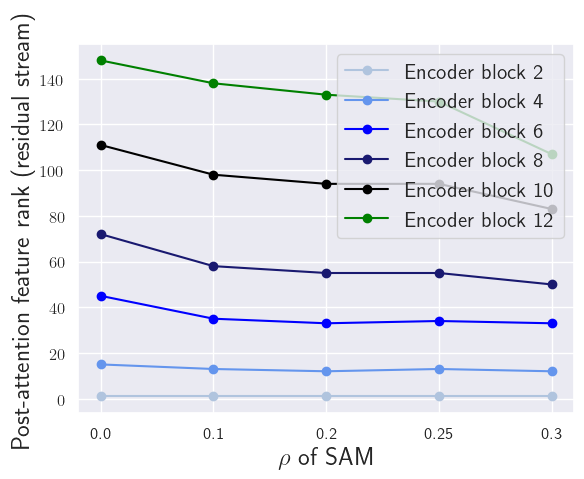

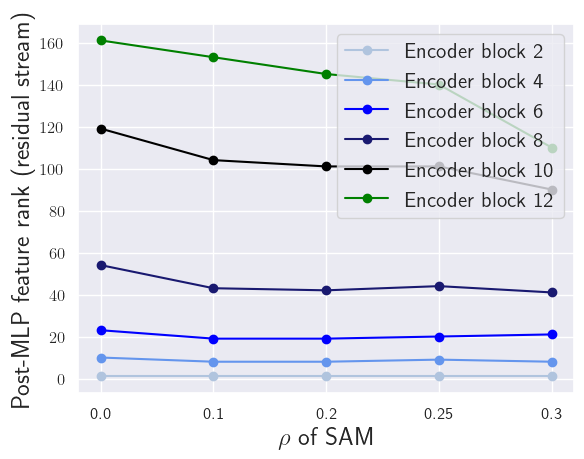

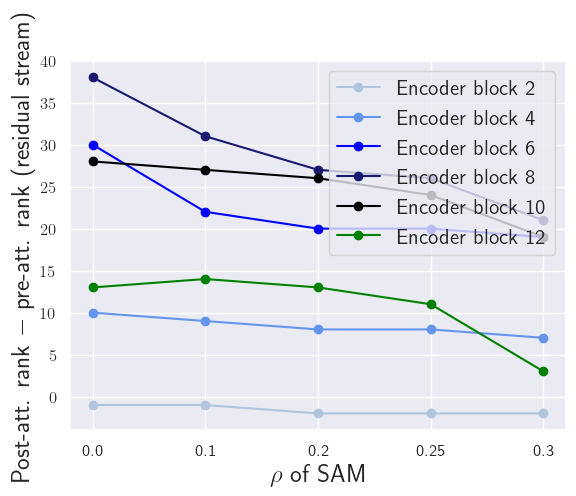

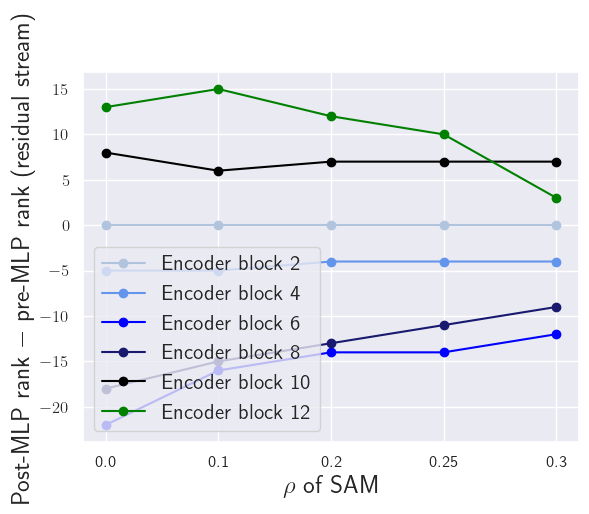

In [129]:
### Analyzing the residual stream
df = pd.DataFrame(data)

return_layers = [2, 4, 6, 8, 10, 12]

for i, return_layer in enumerate(return_layers):
    df_subset = df[df['return_layer'] == return_layer]
    plt.plot(df_subset['rho'], df_subset['test_image_rank_99p_preatt'], marker='o', label='Encoder block {}'.format(return_layer), color=blue_colors[i]) 
plt.xlabel('$\\rho$ of SAM', fontsize=label_size)
plt.ylabel('Pre-attention feature rank (residual stream)', fontsize=label_size)
plt.legend(fontsize=label_size*0.85)
plt.savefig("plots/clip_wrt_rho-diff_layers-preatt_rank.pdf", bbox_inches='tight')
plt.show()

for i, return_layer in enumerate(return_layers):
    df_subset = df[df['return_layer'] == return_layer]
    plt.plot(df_subset['rho'], df_subset['test_image_rank_99p_premlp'], marker='o', label='Encoder block {}'.format(return_layer), color=blue_colors[i]) 
plt.xlabel('$\\rho$ of SAM', fontsize=label_size)
plt.ylabel('Post-attention feature rank (residual stream)', fontsize=label_size)
plt.legend(fontsize=label_size*0.85)
plt.savefig("plots/clip_wrt_rho-diff_layers-premlp_rank.pdf", bbox_inches='tight')
plt.show()

for i, return_layer in enumerate(return_layers):
    df_subset = df[df['return_layer'] == return_layer]
    plt.plot(df_subset['rho'], df_subset['test_image_rank_99p_res'], marker='o', label='Encoder block {}'.format(return_layer), color=blue_colors[i]) 
plt.xlabel('$\\rho$ of SAM', fontsize=label_size)
plt.ylabel('Post-MLP feature rank (residual stream)', fontsize=label_size)
plt.legend(fontsize=label_size*0.85)
plt.savefig("plots/clip_wrt_rho-diff_layers-res_rank.pdf", bbox_inches='tight')
plt.show()


for i, return_layer in enumerate(return_layers):
    df_subset = df[df['return_layer'] == return_layer]
    plt.plot(df_subset['rho'], df_subset['test_image_rank_99p_premlp'] - df_subset['test_image_rank_99p_preatt'], marker='o', label='Encoder block {}'.format(return_layer), color=blue_colors[i]) 
plt.xlabel('$\\rho$ of SAM', fontsize=label_size)
plt.ylabel('Post-att. rank $-$ pre-att. rank (residual stream)', fontsize=label_size)
plt.legend(fontsize=label_size*0.85)
plt.savefig("plots/clip_wrt_rho-diff_layers-premlp_minus_preatt_rank_res_stream.pdf", bbox_inches='tight')
plt.show()

for i, return_layer in enumerate(return_layers):
    df_subset = df[df['return_layer'] == return_layer]
    plt.plot(df_subset['rho'], df_subset['test_image_rank_99p_res'] - df_subset['test_image_rank_99p_premlp'], marker='o', label='Encoder block {}'.format(return_layer), color=blue_colors[i]) 
plt.xlabel('$\\rho$ of SAM', fontsize=label_size)
plt.ylabel('Post-MLP rank $-$ pre-MLP rank (residual stream)', fontsize=label_size)
plt.legend(fontsize=label_size*0.85)
plt.savefig("plots/clip_wrt_rho-diff_layers-gelu_minus_pregelu_rank_res_stream.pdf", bbox_inches='tight')
plt.show()

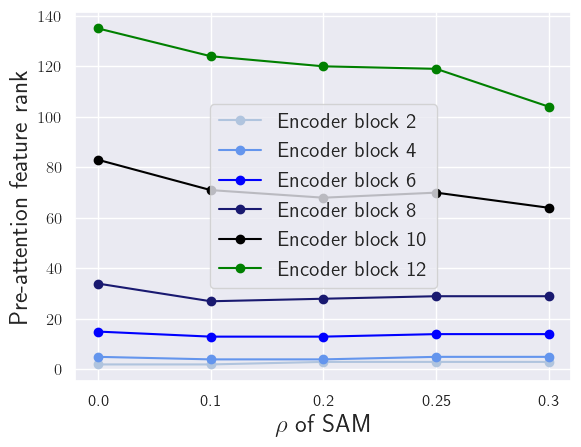

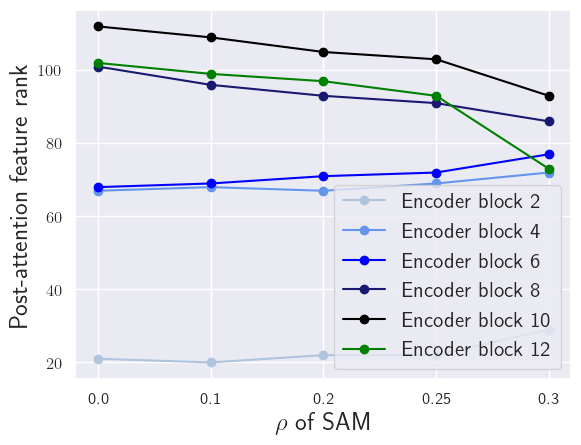

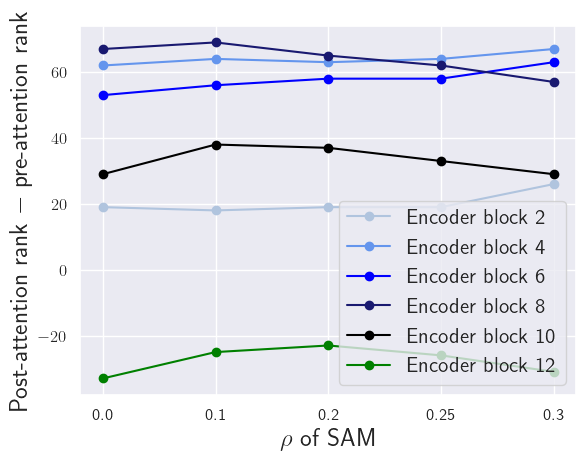

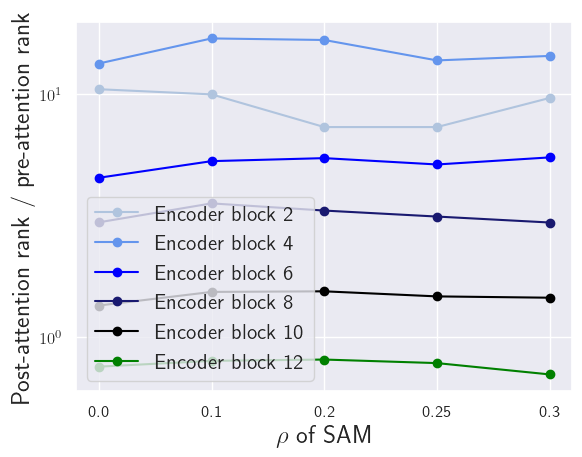

In [117]:
### Analyzing the rank reduction of the attention "activation"

for i, return_layer in enumerate(return_layers):
    df_subset = df[df['return_layer'] == return_layer]
    plt.plot(df_subset['rho'], df_subset['test_image_rank_99p_preatt'], marker='o', label='Encoder block {}'.format(return_layer), color=blue_colors[i]) 
plt.xlabel('$\\rho$ of SAM', fontsize=label_size)
plt.ylabel('Pre-attention feature rank', fontsize=label_size)
plt.legend(fontsize=label_size*0.85)
plt.savefig("plots/clip_wrt_rho-diff_layers-preatt_rank_no_res_stream_in_caption.pdf", bbox_inches='tight')
plt.show()

for i, return_layer in enumerate(return_layers):
    df_subset = df[df['return_layer'] == return_layer]
    plt.plot(df_subset['rho'], df_subset['test_image_rank_99p_att'], marker='o', label='Encoder block {}'.format(return_layer), color=blue_colors[i]) 
plt.xlabel('$\\rho$ of SAM', fontsize=label_size)
plt.ylabel('Post-attention feature rank', fontsize=label_size)
plt.legend(fontsize=label_size*0.85)
plt.savefig("plots/clip_wrt_rho-diff_layers-att_rank.pdf", bbox_inches='tight')
plt.show()


for i, return_layer in enumerate(return_layers):
    df_subset = df[df['return_layer'] == return_layer]
    plt.plot(df_subset['rho'], df_subset['test_image_rank_99p_att'] - df_subset['test_image_rank_99p_preatt'], marker='o', label='Encoder block {}'.format(return_layer), color=blue_colors[i]) 
plt.xlabel('$\\rho$ of SAM', fontsize=label_size)
plt.ylabel('Post-attention rank $-$ pre-attention rank', fontsize=label_size)
plt.legend(fontsize=label_size*0.85)
plt.savefig("plots/clip_wrt_rho-diff_layers-att_minus_preatt_rank.pdf", bbox_inches='tight')
plt.show()

for i, return_layer in enumerate(return_layers):
    df_subset = df[df['return_layer'] == return_layer]
    plt.plot(df_subset['rho'], df_subset['test_image_rank_99p_att'] / df_subset['test_image_rank_99p_preatt'], marker='o', label='Encoder block {}'.format(return_layer), color=blue_colors[i]) 
plt.gca().set_yscale('log')
plt.xlabel('$\\rho$ of SAM', fontsize=label_size)
plt.ylabel('Post-attention rank $/$ pre-attention rank', fontsize=label_size)
plt.legend(fontsize=label_size*0.85)
plt.savefig("plots/clip_wrt_rho-diff_layers-att_over_preatt_rank.pdf", bbox_inches='tight')
plt.show()

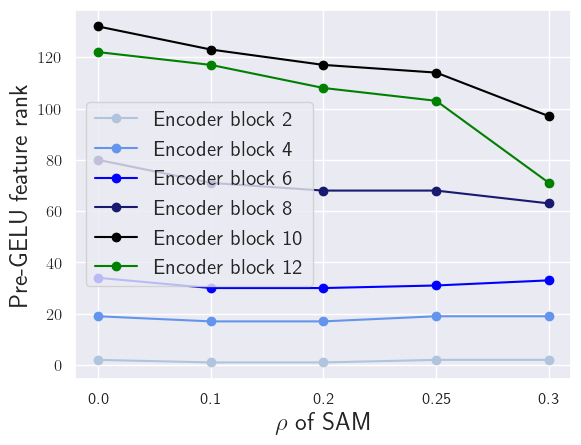

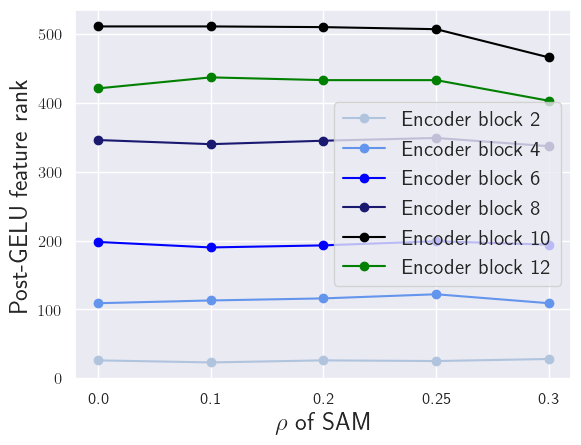

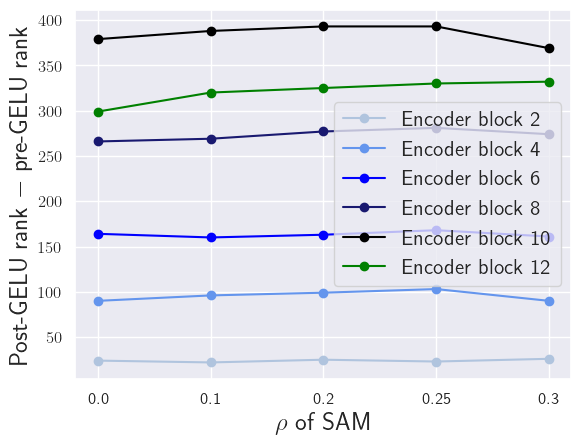

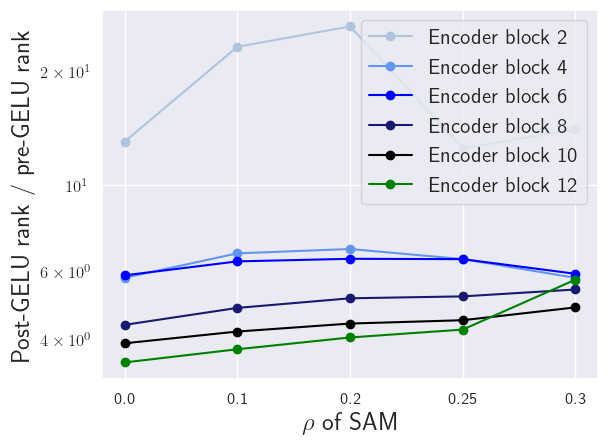

In [128]:
### Analyzing the rank reduction of the GeLU "activation"
df = pd.DataFrame(data)

for i, return_layer in enumerate(return_layers):
    df_subset = df[df['return_layer'] == return_layer]
    plt.plot(df_subset['rho'], df_subset['test_image_rank_99p_pregelu'], marker='o', label='Encoder block {}'.format(return_layer), color=blue_colors[i]) 
plt.xlabel('$\\rho$ of SAM', fontsize=label_size)
plt.ylabel('Pre-GELU feature rank', fontsize=label_size)
plt.legend(fontsize=label_size*0.85)
plt.savefig("plots/clip_wrt_rho-diff_layers-pregelu_rank.pdf", bbox_inches='tight')
plt.show()

for i, return_layer in enumerate(return_layers):
    df_subset = df[df['return_layer'] == return_layer]
    plt.plot(df_subset['rho'], df_subset['test_image_rank_99p_gelu'], marker='o', label='Encoder block {}'.format(return_layer), color=blue_colors[i]) 
plt.xlabel('$\\rho$ of SAM', fontsize=label_size)
plt.ylabel('Post-GELU feature rank', fontsize=label_size)
plt.legend(fontsize=label_size*0.85)
plt.savefig("plots/clip_wrt_rho-diff_layers-gelu_rank.pdf", bbox_inches='tight')
plt.show()


for i, return_layer in enumerate(return_layers):
    df_subset = df[df['return_layer'] == return_layer]
    plt.plot(df_subset['rho'], df_subset['test_image_rank_99p_gelu'] - df_subset['test_image_rank_99p_pregelu'], marker='o', label='Encoder block {}'.format(return_layer), color=blue_colors[i]) 
plt.xlabel('$\\rho$ of SAM', fontsize=label_size)
plt.ylabel('Post-GELU rank $-$ pre-GELU rank', fontsize=label_size)
plt.legend(fontsize=label_size*0.85)
plt.savefig("plots/clip_wrt_rho-diff_layers-gelu_minus_pregelu_rank.pdf", bbox_inches='tight')
plt.show()

for i, return_layer in enumerate(return_layers):
    df_subset = df[df['return_layer'] == return_layer]
    plt.plot(df_subset['rho'], df_subset['test_image_rank_99p_gelu'] / df_subset['test_image_rank_99p_pregelu'], marker='o', label='Encoder block {}'.format(return_layer), color=blue_colors[i]) 
plt.gca().set_yscale('log')
plt.xlabel('$\\rho$ of SAM', fontsize=label_size)
plt.ylabel('Post-GELU rank $/$ pre-GELU rank', fontsize=label_size)
plt.legend(fontsize=label_size*0.85)
plt.savefig("plots/clip_wrt_rho-diff_layers-gelu_over_pregelu_rank.pdf", bbox_inches='tight')
plt.show()

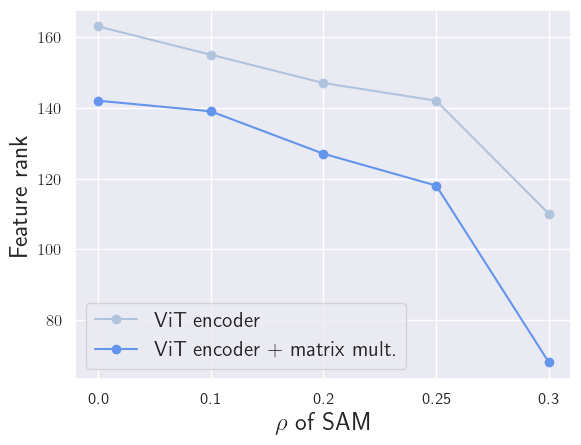

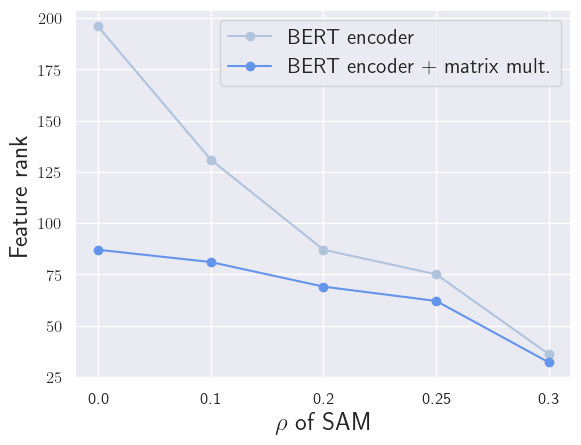

In [126]:
# Analyzing the text encoder (whose base was frozen for all models)
df = pd.DataFrame(data)
df = df.groupby(['rho']).mean().reset_index()

plt.plot(df['rho'], df['test_image_prehead_rank_99p'], marker='o', label='ViT encoder', color=blue_colors[0]) 
plt.plot(df['rho'], df['test_image_rank_99p'], marker='o', label='ViT encoder + matrix mult.', color=blue_colors[1]) 
plt.xlabel('$\\rho$ of SAM', fontsize=label_size)
plt.ylabel('Feature rank', fontsize=label_size)
plt.legend(fontsize=label_size*0.85)
plt.savefig("plots/clip_wrt_rho-diff_layers-image_head.pdf", bbox_inches='tight')
plt.show()


plt.plot(df['rho'], df['test_text_prehead_rank_99p'], marker='o', label='BERT encoder', color=blue_colors[0]) 
plt.plot(df['rho'], df['test_text_rank_99p'], marker='o', label='BERT encoder + matrix mult.', color=blue_colors[1]) 
plt.xlabel('$\\rho$ of SAM', fontsize=label_size)
plt.ylabel('Feature rank', fontsize=label_size)
plt.legend(fontsize=label_size*0.85)
plt.savefig("plots/clip_wrt_rho-diff_layers-text_head.pdf", bbox_inches='tight')
plt.show()